# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

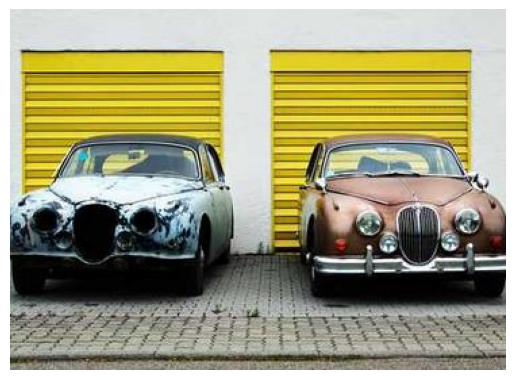

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

# importing libraries
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING
base64_image = """
/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAG8BAAADoAQAAQAAAAsBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDEzM//bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQsBbwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAECAwQGB//EABoBAQEBAQEBAQAAAAAAAAAAAAABAgMEBQb/2gAMAwEAAhADEAAAAeuZ0idkO7IdMh0nGToi6QkkJJxnZDpIdJDJISZxJISSIqSIqTCSQmdhM7CZ0Mk4kwsLIbIIIfUFXFuE3GQCyFMFUJcKsLcKIXMIrBealFxJITDmlJIa4Rca8EUOVhBxyCCHoINgYItgYIMPQQWPXTpmHDmQnz+qUF8vtbZmRqWdk0vmVaXyuaVlRpfKq1rI8anyaesKuz/e8zJIGrLX+e9O5YVm7mxNW5saXW+JG18KNywtG9sKNqxoIbRpT7PnZJerC5/oA/h64ltf5nXCtzrhW9RgW9jCt6MC3qsD7njCtyMWqVnbJVJfc8zJ0c/Vtj8D1ZG2Pm4ltcwrcjA+1RhW5qwrcjC+1jHHdGnMDCn1/Okl6cIKZ53w9dSHv83sQQ94IOPc3rA8bnwMEEPQQWBG9YGrfaL29cm0m+55nSVB405/geresSzdqxKNqxo2rExtWJGxY1WxsarXHNFCRQMZ+rwTsvVhg5kL4OieL/N7SeKiTwrq9DqusLIO2oZQZBlCrciCzaOdV2e7oLJL7nmTOgLCdfwvVJM2U1GUJV16aHyNprWNVrWR40qm3J4s0aigsp9XgmdvVhc/0IbwdMb6X+b3zV7h/owNqOV/Z8IZait6Aa+kyZB5HBOpTHWtMus3h46yH+YO+Tr0bpe7mySoFC1vgeqLWU4B9XPdL9jjRIzq3jnJnJbyGh0K05qR+hBEN+vQHvnX4e2osLK7MkvVzQY2A8HR1Cfze+d4mPt+QHYYfrjnOhhfz1lBm1XIt1K745mXTV0NunRi3D4kOPTrUm6xJlQaDr4PqQDoAHXNHUjr/qecrHntHPcaCeb1coXVZZdx7mI40fwKSSy6MOoXJ86S573qE+mWDGBXG2OUfKVoWHq5n1gea11Dt1mllXFyoiXZZ5LKKSc7B1NlPPRPRi13TvBwDVqXw/Vhp3T75FrZs9+cmy97WejIpCGdltau1LLI3RXTdXZnoJ5LCmjnju+WaImnrx18sGx436Me86MagMTU2N6DPPuenbuGGax0R7y0mvpgUJ1W+dj0c9KXr5spx0dNcj091c9L2iljyfG9O7aBb18nMcSf776PVEdabz83PpxVF+3n6MGzlyHbzbCPLl1O7OcF8+nXjxFGsbCOMZjoLhlv9HmozmBMEWqpB6SztFRWlOhELPcsUCktDm8Bn1zIY7MWdUFwu7nsz1XL9GuiVFFmOqLfJ9UQJTnvXyrIirfQ7cNnx8+xdgjdOBsriWsgNQyFm4pzWw7EH0vOSyF6sGdkc+Fpu1s1HTgakDazoZc7YX4talyE89Bu1Caw1MEyHYC1XTCRlpJqozR0tzmmC+OmaZKdlWbinLLWhzPQ1xMuunN8cTJ1XAtjz2cfn7kecps6vactl66oC5d5o4vX1TLwuIqKRO2tciurIJ0MnQmdDOkJnQrarhELiMU3aZpkjtiD4EKgVkL4SorzMbenfl0nR5QzHSZwaU9ZzqOgyiUG2D2FuvPiCcR24Jie9zM8U3auvDruKzil2dBya7FHHLsmOOfsJRx79hYvIEOn0WC79dMOtSMsdFwNrLQAmDpoVwNHeDjk26eZyi6xjlF1bnJrrHOSXWzOQXXyOPfsZHGGjVg1l9ebW10FkzpKSCplhXe6ZdcYjtrxlsIaqplJltq0ZiU4XAYtKElsExGDuSrlCrGjaVqMiOiqslPNcSnmRdVKommriDydb4aLUyw0yMd1qKZ2ohXbMz6a5GbVWwnvoLGjYU2xmVu6GabE6baxpKwyurB82llrunAzS0VlMbrTOpoqlopSClAmzyXn5EL4DokqHIq4MiTrlHIvaBZEnQaxCIOkTlA2JNwbHZcD4GalGMTewOjEIGRMsC4lYKMY3XYNt1XqOlsYyvraskLbDG+ppM7aIFb23W//xAAsEAACAgEEAAYCAgMBAQEAAAABAgADBBESExQFFSAhIiMQMTJBJDBCQzNw/9oACAEBAAEFAv8A8K1AnmWJqM/FM72LDnYonmWGZ5hiTzDEnmGHPMsOeY4k8yw55lhzzLDnmWHPMcOeYYk72LO5jRL6nb0d/Hnex53sad7Gnexp3sad7Gndx53sad3Hndx53ced3Hnexp3ced3Hnexp3seV5VVjazWa/jjWcSThScSTYs2LONZxrNizjWbFmwTYs41nGs2CbBNixK1Fvo2iaTSaTSbRNom0TYJtE2iaTT1IPnp6GyKVbtY87WPO3jzt407mNO5jTuY07mNO5jTuY07uNO7jTu407uNO5jTuY87mPKbqrLPQ2XUp7lE7lE7tE7tE7tE7tE7tE7tE7tE7tE7tE7tE7tE7lM7lM7dM7dMouSx/Rdt5vrn1z659c+ufXPrn1z659c+ufXPrn1zWua1zWuYpG/0XFeX659c+ufXPrn1z659c+ufXPrn1z659c+ufXPrmJofSzqlvOs5xOdZzrOcTmE5hOcTnE5hOac055zznnPOeUvvs9D27LOw07DTsNOdpztOdpztOdpztOdpzvOd5zvOd5zvOd52GmO29/Q9TWW9Z51nnWedZ513nXedd513nXedd513nXedd513nXeddp12lNZSz0PVvs4JwTgnXnXnXnBOCcE4JwCcAnAJwCcAnAJ1xMdNjei/Tm+M+M+M+M0WfGfGaLNEmiTRJos0WaJNFm1ZtWYmm/wBF663bBOMTYJsE2CbBNgmwTYJsE2CbBNgmwTZNk2TD9vS9pS3stOw07DTsNOdpzvOd5zvOd5zvOd5zvOZ5zWTmsnM85nlLl7PQ9jrZzXTltnLbOa2c1s5bZy2zltnLbOW6cts5bZy2zlunLdOW2ctsx2LH0PUHt4EnAk4EnAk4EjLSkNmPOaqc9c7CTsJOxXOemC2iA47Tjq046pQqrZ6LFqNm3Gm3Gm3Gm3GnHjkFceaUTSqaVzRJ8J9c+qaY848ebMabMaYwVT6L11v4zOMzjMb4Kzlp7ifKfKfObmgLT3/HtNCwoBcLmry4wIs9Fqubdls2WzZbLM0rkf8AfMs5Wm+yDlMNWRDzCbrIHsmthm0zkKzZbMQMPS9jJbzWzmtnLcZc5yXcKq2LoocErinQ43sHuMymVRywWCbkiLTkJj+1mZih6fDLzkVeixnWzfbN9suvspow03mqkZEXHrWBQJZkCqJerz5ae8NSmHFWFdjV6FCm5Ud9mMxZvRYtJt24k24kyTRVTjVbR7Pk5Dqa8BVNmlUssx6xbmawnd+RKiRP/enR7PB248z0WcPJrhzXEni1lPDjgpXjBNNapyY4lx33aRGcFuXcptQgoRkBeOhwJ/6sFW/HCBvRartfx3QV26pRbl2jFfRcEITgoQuDx2HE1h8OBPllcfw2J4d8fL21OA+poass3y+VVnAo8V9FiO1vFdOO6ZlOuRi4lj0nJaibbCUW7Uq848mcebDj5pOzMgTMV91zBRpGL63u1la+JbDg3Pk4isGEEsaznWvKaFXQqV09AVj6rHrrHZLSw3WV0oprY3LfQ9j1fm6zbdyx7n2I9zlMjKxcl79t9dyvA4/Gk0mkIm2ATSaQ+0UjnYmrLoq4aIWWtab+yyNqvKgHsVqzirdqrc9lggz0AGRWZuAHKk3tNrPG46499NbI7PC4Ets9zZKH19D2IlvZqlt1b10V7Rk8ZlaqlJxannVURqrFhv44twcc4gvrilSNwgIjvoRUXhQAFRFvNTI4sRlW+urioXM8VXHZvFTZPDCLTkqjVW57BGtsaJfbXB4na1OFWgxr8ujBqHjtm/H8TFjZORcjUV77qd9Yd9Q7BlLTGf7/AMax6Wtt6ry7GdVX4rnvo+O++jDFtdbWaFX1WxFsVqqnleOu58papjZVlgXxC0MTXale2tFYEE1tNw3XUC6ym7jvrzKqksbrZOQdbZgaqcrLus9A/ePnW0X5l733THZq1quuybE20NnhrUzr26eDcdm/UYj/AOZr+NZknS7UTdo3iN23E5CVwLIre2baKqjm+7X6W8oGco2vrqMdtQT74ZmTaa0XMsZLbzSjZq336iZR+OwPclz25FtBUlAs5qqMdckHG/Ph6g5l+djta9i2IKfnw70K/wCfk5KJK8+y6zOb6sU6WbphH/M1ms1luTw2+Yx87eviNm6a+2NbsZMwbc27mmHk1irIRZh1iy+y1sewWgGjIVG5Rtxb49RNeNk+X33X4jqX3WLle1124O3zUgrYwsjqQKsU2q9fF6KdN9tJUuCIPaVZO1Tlkqbfagg15o+dH73aTw9VgM3RLw6vUt13Srl2LXWmW25/6QxWq2btYwBj0tTMJNtOW2ytvaxf3/VTskCWJPEPYph2NikxbNrWPvJNQi8OofGjCh4laKepq99Jqb8U1KsITQVYpBxaTOjqXwLEPRvYDBuQAc11P6d5iZIpqGeu0+I6quS4qt3XtwDU1gAUGzH4LioreAWiCqyNXYq+INbbMXxKzDry/EbMytlLVr+/6sqYJV4nmVLa99zV7mwDg3xsawEeGZRF423/AJ/vcYlxUHiJ3hID8m94Dp+PectonNbNxMQ6Td7bSYi6KFmnvt99vxaMDPltxfEL8aeZFo2ZSx71UuzKtgvStu3WIM5Yaas0Hwe7XH8GYNZlGlu/l6Nm5e3sNZWMjxNpu8UM4/FGmUNMr8D2/wBw/QWVprAnvs99Jt9tnxYezCEaE5LVZA8bvA86snnVkt8XstrXPauzzrIlnil1qr4tkovnebPOc6WeI5F081zQPNc6C9hPMsyeYZc7mS0zl+78B9ELTX/YsrqiJFWATSae2nx2/Ep8LB8T/tGkBXT8Yib8i9GsnAZwGcRnHNhmybJsmybDNhmycZnEZwsYMSwyrBO4VTj9tkK+xT249AE9lr+PH7PUdrUODsM2maTSafjT0aTSaTSbTNhmGvHOFdWxzoMXQdevd1q9OqpHVSdOdVdvVQAYa7uoIMeszrIYcdNeBVnEqBU9visqtVl/ZMdk2H9aQL8Ns4xr1w0bBfXoWzoTy/WDw8Ty6eXTy4Ty8Ty8Ty4Ty9YPD1nl6CeXpPLxBhgTluAqPGrb7D8rpuNSAuwHyfXQDcp3OWtdjPcCpyV3Mo3aHU7hbyG6xuIf/OtdsLOhcOV4LbF3+72bUVztFp3NaVfe8FhtrLvyM9gi26qLSWsZ9d3tXa+3kADWOILdZz7Y9xEe8lRkQ321w5NhBT2WsrCvIGUVziMUMWIOi1aQoLI3wVazBq1hUaLWRNAzltFSv4gnmYALVuVNTzMTsRfh+rXGqp7J7C6wbkQb191tsrJQa6beN2TWIA6ldrvWJ+x/CGs6qNy/wLV6Ti1GmxePSINIw3HdtgALDczlNorEfcwAKL/NiSsCe2m63+kQqGAaaSv5C5fjtWAEPZrsH6B1tYfGkjiddbIgGlnwXaJWNruuoG7TaAxX2rG5GXY5XUKXAK+4957hjX7rtaKpSbQZ8IANxYmAVqPgx1SAoIzIZvUTcm42VwPUJyVM29JuXUsugtrhZS3Ihi2II7oRvSbhqbE0V0VWdDOVJyrysUIRlVCybuRYHURnUjkEDgPzLEsADsGnMIWUtqpnPsjWic025JnHkbuO3bw3wUWkcFyTr2Q0MT130GNZBjWadZ4MZ51WMGMwJxrDBRYJ1bJ1WB6rida2HFs16rzq2GHDbXpGdV9Om+oxCJ1GnWYTq6xMXSGj34ZwqIaV040hpWcIhoUgUJOugPXTThSCioz9l4Pchjtef1F/nNNU/v8ARJIm47q/dH+M/qWHT8aQ/wAh72/siLP+WPsP4ISwIAikkaxPlP8AgD3n/cYxWO0HWAkjUxSdQByf/8QAKBEAAgEDBAEDBAMAAAAAAAAAAAERAhAxAxIgITATIjJAQUJQUWGB/9oACAEDAQE/Af0cMhkPhDIZDvpWnm8XRJJJJJJKJRXm2n4asXWPDqfK2l4asXWPDqfK2neTcjejejciUPF1jjPDU+VtK1dW09fdU6f4FLOx9E2VXV1gkdbHuP8AT3HvFXUaepPTNTNtLNq3LtS4Q6r09MfV1grwOfse4ekz02U0NDocmxoqcu1Ne0eo3wizFwWCoj8kTaDF9o6WhG3h/Q0Ni4LBqFNnqQzd1I2UsrcIoq7GhCZ1Z4IHJtbFngsFYiqh0qWOjs3/AGvu3CSRHtm20i8EECXCbKqB6kknV5gTg3fQR9RN5J88EftI4f/EACwRAAIBAgUEAgEDBQAAAAAAAAABEQIDBBASIVETIDHwM0FhFCJAMEJQgaH/2gAIAQIBAT8B/kSic5ylE9mqk1I1I1IlGpGpGunk108ic5Y/VC0kXfyabv5NNzhmm5wzTc4ZpucM03fyabnDLNNfUU51UXJ2R07nB07nB07nB0rnB0rnB0rvB0rnB0rvBg01a3yx3hEslks3NyWbm/rLHyLOrye+SfZJ9kn2SfZJ9kn2csL8eWO8Ih+oh+o3NyH6jf1G/qPfBZ+RZ1+cvfoj3Yj3Yj3Y9+s8J8eWOiFJsbGmRWKn4R+lr4P0tfA8PWvodMeUWY6izq85q239HQq4P09XB0KuB0R9ZYT48sd4RJhrPUq38Ct00JQVVKnyK4n4KHqIG0/KLllU1U1053IllKTcIotUUHVo+ka/wdSg6lA1S9zF2Fp10mD+PLHeEf7/AOlm3oogdMsuWnVVJRZpp85SVKUW1qph51v9zMNDubiUpnSp5FWkoNSK4qFCUEplq301GV6x1YKcJbpcx3vsur9zMMvwKr6ZBGUTnqZM5T2pkD7K05ZhaeSIyg+4ENFO40LKDfJEiNQ/HZUrc7mH0/2jExM0/ecQhvKTUT2TlPZHAiDShLtZH8Cf8NPbPfPbBBGcdkf1IznKM4IIyggggjsns//EAD8QAAIBAQQGCAQDCAMAAwEAAAABAhESITEzAyIyQZKhECBRYXGBkaIEEzRCI3KCQ1JiscHR4fAwQKMkcJPx/9oACAEBAAY/Av8A6Lp85H1Gj9T6jR8R9Ro/Uz4mfA+ogfUQ9TPifUQM+JnxM+JnxM+BnwM/R+pn6P1LMdJBvsT6uZyM3kZvIzUZqM1GbEzoGdAzo+pnQ9TNiZiM1GYjMMzkzM5Msxnf4dV3I2UbKNlGCMDBGCMEYIwMDBGCMEYIwRsoi7K/48DAwMDD/lalpYpmdAzoGfAz4GfAz4GfAz4GfAz4mfEzomdEzomdEzomahWJ18urRuXAzalwM2pcDNqXAzalwM2pcDMZcDMZcDMZcDMZcDMZcDMZcDMZ8DMZ8DMZ8DMZ8DPv4GffwM1bXnGnVpKVPMzPcZnMzOZmczM5mZzMzmZnMzOZmczM5mZzMz3GZ7jM9xme4zHxF0q+fV1m+ZjLmYvmYy5mL5mMuZi+Zi+Zi+Zi+Zi+Zi+Zi+Zv5n3cz7uZv5n3cy7C/qusG33GVLkZU+RlS5GVLkZUuRlS5GVLkZUuRlS5GVLkZUuRlS5GVLkZUuRlS9UZUvVGU/VGzZ6rShXzMr3GV7jK9xle4yvcZfuMv3GX7jL9xl+4y/cZfuMv3GX7jL9xl+4y/cN0p1W1KnkZntMz2mZ7TM9pme0zPaZntMz2mZ7TM9pme0zPaZr4TNfCZr4TMfCZr4S+Veq3bcfAzpcjOlyM6XIzpcjOlyM6XIzpcjOlyM6XIzpeqM6XqjOlyM6XIzpcjOlyM6XqjOl6oatV7+rfXyqYT9GYT9GYS5mEvRmEvRmE/RmzP0Zsy9GbMvRmzP0ZsT4WbE+FmxPhZsT4WbEuFmXLhZly4WOia8erluXgjIlwmRLhMiXCfTy4D6eXCZEuAyJcJkS4T6eXCfTy4T6eXAfTy4T6eXCfTy4D6eXCfTy4T6eXCPVcb8H1WlCvmZfuMv3GX7jLXEZa4jLXEZa4jLXEbC4jYXEbC4jYjxGxHiNiPEbEeI2I8RsR9S9U6rUVHzNnR8zZhzNnR8zDR8zZhzNnR8zZ0fM2dHzNnR8zZ0fMw0fM2dHzNmHMw0fMwhzMIczCHMbaSfd1W3Nx8zOfEjOfEjNfEjOfEjOlxGtp5cRm6VmOm9T9rxH7XjP2nGfteIx03Ebem9TOn6lfmy4zOfGasq+deq3pJ0f5qGb/AOhm+8zf/Qzf/Q2/ezGfEzDScTNnScbNifGzYnxs2J8bNifGzY0nGy/5i/UzbfGzM97Mz/0Y1B1XjXqv8NyMh+iMh+iMh+iLUtE0j+kI1MuV/a0jYjxM2IerNnR8/wC5ho+f9zYhzMuPEzLl5TX9jHSLxhX+RqtTp+7/AGJNU1eYtHPRpN4Nbx1jZ6urCvmZXuRlLiMr3D0SgtW6RJfuu81db8qqbD85IwjxM+3mbK4f8l6h/wDn/k/Z8P8Ak/Z8zYi/CTK/Ln+lplU7UY7V16MpcRK0qOvVaio+ZhD0MIehhD0FBO5b1/v+3i0aooxI3YRKKLqa1E+4x5FFo6fpE5NWqYI2TZ6NmKl20vRLc5RUvNOjJaSCv0bo/AjKWK1X1XZlTyMxcJmLhJ6T5i1V+6VlfadWa2zt+bw5GzHzLlH0FXf2IumvA2uRe16F8Y+hc6FGSifxLBiSnZS3UHV16rekkl5m2uJm1HiZ+G9eeDTwW9msqd39DuqTe/Acp7ld0az8j8ONldu8q+qvzNesa/0JaN4aSFDSaB77+q/mJV8DZXAbC4GQhooqrdXdS4nBYuKhXv8A9ZOTwbuMORjEk1hu6FRuhJKtKmFRavIqleu4vGtxG0k4TdL+3/f5ErCoq9lOq7Ma+ZlriL9GuM+fJRs4Rv7DaRtFG2Jwkkt9EX6SXobuExXCalh+KL7Fe6pjzZ2+Zfa4SL3247uz/wDpGaq0pVI6VSpWSp1XZs+Z+z5n7PmL5jVYqt3YfDzqqWrUqnyYwq444lVD1j/dmso+kTVon6n7F99ku02jj4QFX413YUuL/iq+MUVXxSp+7S4pN6N/pf8Ac2Ycyvy4v9Y4S+Fmq74zTH+EsG5Ot9x82W027kVXS46N8qm3T9J+JJzhvpAupTu6naysvTq4jk3ShqLSS/TcOC+HdHjWSuE6UdPujeRjGw4fvd/gV0sVGVdz6jXzLJ9S+JD+Xp7U9ytIrpIwfY+0tRha0LxVTSfMu1uy41Wn4f8AJGSVZLGnZ3nzNHp/lw0r1oy3MjC1a7+3ocpNJLeTlortHB0u+4rreZrOz4jl8JPxiWPiY/Le5u4sxlbkt0LzVhdvtFZaPS9lVE2qPDWuKt3GNX3Xl0PUvkvI15u/tZFWL5YVRgqdC7uhrqO1Ft9yMqfCOKhKLe9ovPlyQqK4rLRQfkarkvMuo+RrqUfKq5FYSUl/C69G16Dpar4dNlJt9iNe5dhcVLNfItRPlzVYyxFH4fRxa32XgOH3bykoR7nS8+ZHTJSX20Gp0kR0egitEo744s1pyfizU0k4+DHo5LWbrbVzqaOdj5sp7/71GtWLxsow1Sey60srAovh7XYx/FfFScqrVgSem1ewrW7ErWqxu6Eu2L/p1G1KnkZvsFr2vKghNFO4lHSyTvup0YeZq0tdxas3+AlGFWWdFFTp90v7eRLZjZi6svjBx/doLSRqk7saCSuK7ilu/dUlo5bSIStUslPtkaOEp6zROejUUpQqxyrWt9eiGkje08DT/L0n4UI33b+rGtIq6LjTcSlLtdOj5kcVIUfntNuzZ7hQxVL2yGjWy5aw91p0JaP06Ifll1MZeVTHSe4jR6THfUaT2pUI17KFOhyIRWxFepo7UlG0sak4VxXMqsaOnoSv3P8A3maddsJrlUr5mmjuV/P/ACNmijCtlKsu80c53u1s0NHNRsLCnRczSu07sF2ldJfa1WX+or+RLRRVZzx/hPkRTwda9SFaUV95lzmqWW3IWjwo9Vso2qdo4aO6Pa95oabo6w7auaIW90W5Gjin90mPw6IfkfUeo5V7zJlxGXS/fIgu9i6bKHotJSOkV8JCnPSwp3Oo5xdOxPciDetGtKop/u4veP8AYX5T4imLj/VDU3rdiRraOsXcy7TTd91Y3lpKylsov6LRa/iqSimXluKuO/qX4Hd2lnd0WZFdGqzLek1pMo4qruFTch9EtJ91bNelywHWTVOxmZL1PmKbdntYqC6O/pVvRuLd6qhSdbLVptKpWNaUqrUcUMV3Rc6JySqU0mjt1lSLUt5FtO0+0l8QkrEepmcir0zXkZlP0meiuj+LUX4lqXxMH5l/TXSyUSnz1T8ov/kq7uKr4mBGxKE/CRcn5FLDFcaVT3RY+hqjbrUrYlUf4M6jjYlUtOsTN9o38zDuJaeqsxdBS+VKy8HQ2GUUZGwyrgzRp1nRD0UoKUMPAjoowUdHEWk34SEIjGmGPiRjtWdlyQ9NpZKTGn5GHomUadfysu0UvQml29W91LD1ofusutI1FR9rK7+rty9TMn6l8mO8oumlDDpXRY7WWcfzI1vh9HI1vgtEz6LRDp8Ho1LtFa0MdLX97cXfBaBeRVfC6Cv5S3GcNH8Tg4/bIu0bT7nVClPUS3t3lj4Wz8pdxdFcI3YXAWpPX8DCXCfd6G1L1NJ4/wDTw6H0XmHSvEk40etvRl6J/oPp9Bwn02g4Rweg0Kr2RFOCi3/EqmxoeAsyUKfwxoWY2KflMzkZ3I/EnapgUWnaR9RI78an1Ok9T6jScRmzf6i12rpp/wBXyPI8hv8A58F0pbin/RrKWG5FCnb0s8iItwh3dGH/AEHXHtHQua9DXdX4FHQwLv5FKFn5l/5TtZVj6O4s2XgWfu3XGrHkNbi/EcpOlbrxtyTpdcL1MabyrdzY+hYj8RmFC6UfQxh6F/LoxwxKf8F/Riy5lmMlLvaNZ1fkK+xTsxLnh2IsuVrxWJrTh5IpClFvMKkpySv7sBSjZsLdZFBJVKtR8mbEVHcWVG1vcmWrKFOSV25VLNiNF3jVL3crxRnFO4aWjjGO43O095uwI/ixSW6hYaWA3RPuFWnqSVmC/UKVIut2Jsx5jpZi/wCRSxGlMbxWYwfiV1WNNRTE1KKW+4+016ehekKzErZ8UfiKMSNKWe7Eai6N4XFKq1Q7Y+GBqteaNmT8y1J6290uNp2e5G99xWsbRvs/zLky06Wu3sLnd3I39yRWl/iUWysaGDKtVbKdm5FS6KX6izdZSHStRJxvO9LAdUxUovMs7qDs4irAdHRtYI1hNULO59hdaqKsUU7cEVsttYFbiktl7JahW0uZfFGLxuuLVl2ypSd9cGOUE6/zL4itSeJcjZla3uhfFxhvVMTH2Fde12uJZj6uJjyLbi78LsCkU13lFVJFdeVO4uTbf8JtcjtiuZsGN5Zbr3UP8Fbl5CS3vcYEmOorru9FmiV2NB4EdUi4qlMTEpFNlqnIxXoTjjvNVXiK363cYOvei/HfqlrFYM/yUbVRzvrQToUnd2ULUWrXeO5eBRPV3XlK0j49Fq6pc0UN1N3RjeUuKVKyaf8AQxSNxS6iLqDdozDFFa3LovxKJmJaNxiujFHc12jv5iVUK9V6MbihtXlqvj0bqbjsawfRc6dp/k1r12m5SNxfWhezaMTbQ18yhtm1TzMeZtI22jbMwotJTuH+KLXNu4v0pm+Bmi/FqbaKfMvL5o2zbRtqhtm2SpLyqbZrTZtyRT5ki6cvU3+pf/M2bvEw9xfh4iu9xg35lL15n3F9X4sw5l/RLuE94hi6PIbKd4zHovLiu+vQiXRLuPMo8L+iu/pi95Gu+pgOvQ67mJ9C6H3IXgTvGKvYPopS6h//xAApEAACAgECBAcBAQEBAAAAAAABEQAhMUFRYXHR8BCBkaHB4fGxIDBA/9oACAEBAAE/IfCvGv8A1oy5cf8A7NP/AGr/ALeXg/8Ab8MeC/73/ggEkwgcE4LdTBQ/gploQQvOLn7U/ZhliIqVb9yEQc/zjOzM7szakzreFAbELc1oSZr43C0hfV0nDerpOEHm6T8o9J+Uek7Mz9PwwfcTfipYVHfHpPzjPwD0n5x6ThvQ9IjtfyMx3uUs+2sP7OaJEipaQu3W0JuhPx4BY9GfkRGn0n4U/Cn5U/CnC+k4b0n5U/Cg+mn40/GhJ0IIAC9v8lhQqJEiRYSaTgJwE4KcF6QA0ekTaJEIh4KKCUplHwKITSOwTBc/en7xn6hn7Bn6Bn6BnYGdwZ3BnenpO1PSduek7czsjPyj0n5h6T8c9IFQG9C/w1DcIezSdyfE7k+J2J8TsD4nenxOzPidnfE7O+J2d8Ts74nZ3xOyvidlfE7y+J2n8TjdvhON2+E4TDk/r/GkMDwdCmv/ABTdpNcbnfha5nBxUcX6p+0hRuF6tp/hQUwBWh3cI/vS/vy/vT3zL+5L+7L+7PdP+d3d88+ePP4PPcJMhc2yfz4jweZtg3nd9U77qnd9U7Hqna9U7/q/z4wpL90L9kJ9kdg+CDeAcA100JB8X4GIj61nH+npOL9PScV6ek470dJxnp6Tth0nZDpO39Z2/rO39Z3frO79Z3frOz9Z3PrO59Z2vrOKBTf+U/4rVr/lXd++M74ztjO+M430TjfROJ9E4n0T8hPyE/IT89PxUUyPbIX+eFswi/ZC/b0Tu/Sdk9E7J6In39EX7uiJ93RE+7oi9h/PAT9mP2Y/Tj9XxaKXQuSy/wAk8aOOJwikVI98SvAqqmwPCLx/4nVgIIEeKaCCEegjwfiApNPLV/i5b3/7W3Xfvd/+EMZljT6cIL4co1BQv88xBKazg+/KcP25Tg+/Kdo6TvHSdw6TuXSdi6Tt3Sdm6T9d0n6zpP3HSfsuk/YdJ+66S/58MSMhsX/k7EMm2/8A4QawxWMYxDmNEM4zznQP+HnFkSqAa/5k082H1OY1nb8QLHIGEeCeXpD3fSdr6Th93Kdj6wagJJyCMZ5xiVKR18EbwCbur/VQjhvV1nePrO0XWcN6usDwGRw60B1uXUh0Oy4zZ8CiMaU0tUob4g0XYbxoYCOPUnb607XUl/PN/wCDMIpRyAKv/BwiAg+GBQs6DmZk9DdIeePeEKNGB/iAz93Snc6s7Ylq+1IgZ/Prn5xRbj5z+wumz3fEBA5wQVjzXBRkPczFTCCZTYbjCeAq/T/JGUcNBrBsYfiJw3oioWy3bSEsHlsbAHGAuR5n3UJVXkD+AwHwLzPiEoAMeB/MBHy4EbR5oBvtj8IfmazkF/QYVkhjU9BMFC4SgdyDcP0uEAtlNxf4usLbT9VP1XWAhAhOjdYDDe8J0JHOwOA3QZwTAqDeTMBzgUSKgIQBLUAIEEdAcE2gToQJiCICin7QnPojNDEoARQKbcGZdHVDBnvo+cRQP452D5OFzB54xv8A5DQB4vB9Cn5aFjYHCzDjAbLw7PtK52uNyfwnrMKbkcxJ5DCIE9kKV7cEYWRVsY0AkbR/DCwnIULUP+iYOuK7Az+n1uIEjFAgKGz4Y9IaBEyGl414EJGjMa+IzQ1jSCB7RDiZZCPXZVeQVCsK+ITOugTq+Qzk+8agvYyZbAdxcGJhJOpmsAOxgFwiCCjCS8IP09/RzJ8jzj9hKqiDiM98Jj/FsZpZmI6/pO8PiBih8eiAtAAdhFV5lDBOgLAwPYCJ0ecGoRmCU7pNoQgAaEVGkVlooOFw2y4YiYJGJu4CQcJsiDAQCeSWXoJVfke4QLXIEakfj5Q4CFaprPyfSIqGqDpDAA4CGCL+Er0lYQx8y3UfgGcSsRLNMGP8CD3uIGfkesKr85HzEA4a1T1c21cqFaOQOkWB9X4cUpQJRIWZNQErYHsR7wIkFJxH7DHH4FyrFjBu+qON6oIeWAQZAGfUxbHLtc/2BU6BEW9BEIQ4BMCsDsBfwQp82/EDSyfQiB81U1D/AGZh42EKDygRRzr4gJfLK7ylQXkQR1ERfhsQ+IIVJgnHEOnWbMCZPOvOZllNoOhGvY8Ms3A0jVcaaQ5wgoMcFHvDhfY0QeJC0gRp3AaecvaLn4og242IhUQ8XxCa3YxWFl+vbGpiRN8D0HEEkSyTyNEAz/BOHDx0hHHhYu53OhBCG1Cz2jYMYCSR5/UIQyRoxvCjObEFq6I8rl5x0gYcU4D4DF5sxB4I8eZhSDA7S/mrhG9ACyDOyagmYgGT1HJ8BkwZI0IRacjn9IBQU0CzCCIm0IOEAc8hNemkMQlPLeUeevQnHNYh4EQENgB8rigxJBEkQ+AWigyGFABuJhEVyl3tGGwcTUIyGI29YoCpQOuVAVICWgDzNTaIwm6pxJyHcc0gMD59hJn4XrMJ0ARGzAxYsMZGkXEBEswbo/WANeoh7y2X5fDpNAWpPuPkJxWNAD263hRKAnzfyFQSoTdQAyVzqI2YPhBlzBt0NeZimAAGm0YRPlFuCBAfV7QEJR9oY6PcQC8JX9CBgiIpoD8xgPGggRjhWWTgjaCLDtVAwORyO7hV83TCDOZvEfcU+qN4rUcUBN+xFRLpW4MLC2FDpYFqxwnDMc3vCGswg4C4aQ05ep9fiNKksaqJwMQlKrj9J/VDjEy+BKBWtc732hqRikZLogBGJYQPCKs2k9um6BRBORalQmeI7sx6hKJyEJFTlBuGybVOCmwPMzMdhykCQ9NMQssWSLFMc4FE6aFbYqGM7Z4wxoByZWEwRU0s/nH4P01EAYzn8jE/waz6yggFxeZ53Ey/AQab11CawSLiIgb/AOMEGawevR5wxFO5PAFGCtYYIIxMpPB8XtAFUTlA3hZiLjYAQwCKC98oxDQuCpcMQjCP54WZQUxxUpEDi+Ed14Lr0x94e3PSq4QfSMEEVTHkvSHGhovXPYcBziBF2LB3CE5A27QshZHsYRncH9gR5P8AR+Iwa4IMrUNIEAngX2cH1qKiPOPFozOoFZhQZsqMkD9J7Q2PXdMzEQMImQeSVMxFs+TMjewfGv8ABuc09FCe2pgORE1TkOESy4moDJV4ynqYEH3xAVzhUmAhecEB0QbmDujJ+PAASOs9onZS0FKUCMxsSH8WItHFhNbTE8E/kvyJfwnKJ6Ag7SDO/GA2cM0uAEE5qveEQeW5eilh1YPs+IUnUD1WPIxgPaZmMXP6I9yQ1ih1XZmVAhyNhAxEq1siEplKsGGLiAQsx4E6MFCjA9yTzhJTDfWJA40iGj41HIKiRtrD9EECtpqGFIIbYhHAoymmDrDAAgzrEoAAJ2jhGLoWFkiIHhh2lTcIVQ0IYo4FjwcGZgoBVnMc6bQT8fDElsgmtYJswID6ERM2TvcQiRMwHDyGIUxvDAg6R6KTmGAKLlZx6ReeEGNaQgCA1p5xWbjhA3SqEhYzguvIzfp4BA7RJtCVF65qB6PNAfE1xAvPBE5ZkWWjs6kXD0eoYPHwAJKEIYCQATfpmC3zUAy85R3zQ57m9Qmlh1wQctbwAA5YRiIXGMIlheoxKQRWsYScAgIspoFCBAJYsGPfmQSajNbxDhEh8zS3HIB7iLQS6knSAS8kBgtFvKMwgPCI16wiIGxcZwmU6QwxAoTbQRdEnZijlPLOhnvRAYCQad9G08oKiHUCmRRWTjkID4BIQbiJ6+Y+Jy9T6IDFI6sP7AgyAMAQCKICA7oSABDjF1B/I5bS4EGxR94CGZHGhWIvJm4T2nHHCSYENMGDFHyOEx+bDnDmTEMFQJrNYJs8bg6BmY9gqjkjx2hNsW9INoALhlVYgQ9DPOGwXAQyJTuwJ6QBFe10hbeUNnGDH36QatJZAQMLGahmIQNiICBADo+5c1g8Rk5AUPOFQTAN73vWAgmGbiINkIU8vSS+Uwvoek3Y+TpCKinkEMxxeJGw/wBs+LMZ8B4JicQpCPSCAs1JCAWbyYWbcdYmFlvFGfOa8dtghJQAiLNYNA83FjJT33iu1/YAB0dkDhgsKPeE+fTxCdnQfqIxIDihI8zEhL6YTfTFYEFmCUAoeBAIQm+uACSSTNh18Puz6iYB88ihtxuHivlsMP8A52Q4ypmam8Ze8xMZuBNoECtHAwmLhWcpgXbBwe03mXgv+QULYI6GQbeL6DAEn0gxhWh1hHnwUaGNtOFGj7R423gcKPtOFOHBiCbSBuYOIByIJhveqxF1NgO0woG6xE6NhME6GFCzQQymWRoa5hC8YYWIMS0wxCgcliEwTUI/APG8CMaKKL/AfTwgfSWNC9kJUL3hZkgnQyKk8pEgg8DeExMQOcI2q90LKQ9agEEhvJPeL1gGoyYcU7r4jAXeAsQFZQTqWowKMFUixO0PwhXkXGZTDsS6QGcAI/0zGUs8abTEg1MsTTCxlKpJC0MAgJZntAAZAAWsEZVUAsCoHQAesXWCvRwhOEC8s4hQOYLENfIVyQWwc0dGrih7wh5kkkFm9YgK3xMHH2hzuuUxpx4CKcvTxmFlFiAJMXgxCQKluLlL8hnk4JR4wp2m3yMNUiyQlzhJGk66NvWIG2mUoTIDC0I4OIory3hxGbJOG4XQyHaW84mXE9DLS/uwgN61ZjiVYXAOCNljUJkMJSdwFpAQKF684RIx2WQuDJBjGlnCAEFoxlksAWYQgE+MiEFpCEBbCwZg5gF2ecBAFhsWvaKRXQTBxOO7QjLTzZ9MTawEGhxh0jkYZjbYzZLQO1JjAaW/AiJRbi0CT7zSg47iJw/FMIk0WUKUWwSUcuEBq4J0ZsKXqnkODLrAlA6HzhpJakpNxiH0hinNBZ9o3JzOojK5zQoTAzAaLncCoFLOpUCrYEJfnMIxhACPPMyGDUQSfmEQBQcg+yXBp0vEdSRZRjk2mwnOv5xsGCoQIuD5LGBjwrauUakHOyj8QpliHzBIG+ccE15yoWllsT7Ql+YO8MT0oAOADJyOTfOEjA7E4AVFXcwgCxBbS4Yg76lVGThUx0yV7wBgBIFoQNOEROUphNYZCpYUGsirEGQT1gxwHcbGAYi+UZVryh/IUhaMEeiAHUAwsQNAb0EF6R4+iDpwWJRsHQxHDipOu0MW6I/iE8dqQIhh+DXpCLi83rcANmSw7hVhjEYpzGwMMEngDYyAAAGUQfuCaRQGFmoZs2PaCww8IU4YGQQmxYqqHKJnArAecQILHgC9IVm9Owi+oSGNisUJdbCyhDQ3xZNHtv8AeC0w3Sp/ssMPSWoMSvnBhQBKbEIhmgRZAEdQNBo9YUhahlPSXDw2AgTHJya6wyoMxUI0ZbECNkIomoVLUiSMBvURCAOLy3DvSJYsCEDAOQAUJMgRLAGMI1MJ6xISAGgSjEIgEoXpGQSB2CAOmKIxEWWwR/ICgr5TYA5IhzgsAUNEJZZu0+WY4wEYQLcTKDDEuezWkQLXdQEA0N7iYJIL4DLWEY8YHWYAQ3TevCAUJQGIMQlDEDAoreoIQPGauVQ6nCPCP1IGP0jAldrplQQAYNIOo2OO84A3HbAtooRjA7qK11LdEk3ALEBziIZhBYCMpdHMRBHdAgKgWNEoYgWoSlJCHIwHOjgolXxE4b4QiAfEiN4W1hIFR84RBkG7SIzVtuIN8Pd6xpsYPMIpBIIOkBaINQfHCGGiJgvED487MCA9RmAqEGouVjZZeBAQ6cDnMsPKBAAOUCTiVkQ0RhoDlAbKzhaIatPYuHYTNhuM11qsQgoGjqITiW2UjaNJkaiPQxqifWBiCvFpDTa+BhYG63RQEI+coAsHOFGVHgDCDD6poEFYupp1a5uNsjXOA2eHOFzFbAw0jd4sQFQPAiUGiiqtwHbiisxmnPKUgAQd6hPJNwM5+BvLJPIp5FxxsgIcUUKcqWzlIAFhjG72BaHDLgZite0mYXAgjcUaGt0ym6cpQwCJkLQpwAU2dypPWPyYyvNDgZ5EYAKZEFjor7RkAYEOBFmIR6S3k6hFMNPeZPgHMB6k/EKsGiv7CBfUFCIUDipg+SUQcTnuaNlYeJwxkMQXbeGBKs45Q2bkGYUiuyDGAzBuWISYDpQHC9IhAAGTrAW3DqCw28yAOICSXJ0PWEUzSEsQxAS1iPcTabzWariFMCgqf//aAAwDAQACAAMAAAAQAEAEIQoAIMEAgIAAgEIUAAIMMECiOpZRQIwUImNnrBVZVMgyMnVp687JAE//ANUKMdHssCAGfNPtjOlGQMrmiAb7c5U8QFMGqCojhhMxANlPshioENjwJvh6pENP4XAElNTNpy/ukpQO6HneLXpF0QHMBTpbaP1u4CIuhssM7wH+QNDCPcozDJWhLCGtyNOu1DogukttF02e09xKWQ9l5xqR9F45oP8AvkzQvULI4Wk8gLdEDMpJMjOWdKUbkIyVieQHHqNDkzq0nN7Bg7cPfxylQwjACBDjoHiiuppXxzwiARkT320Xs7XjJjKwU3EElFGH1njmq/seXxThURblzHlm1WM7AjDggCggKgACTilrRQCyWVw5RB+qtPP9sMl8v9HzKiyM8T//xAAhEQADAAICAwEBAQEAAAAAAAAAAREhMRBRIEFhgXEwQP/aAAgBAwEBPxD/AKKXwjI+iP2Z5+B8j5EZGR9HwPgfAjW+NmVEFXGDBFw6rllEQQQQSRwew38bsnw/DPRH0Q/DPR+GznUZ6M9FYr0O9FfRX0Vw2cbMz2T6Z7J9Neyvs/T9NguNRfp+k+mezPZPpnsaxsThuylIWx9g+0+ou0po3c6DHNRBUKsdnJu+IBIotHoE0OwVCvpjmyfOocLJsIp7K9CdhraiTlGPye4+jYiSS0JgVUXCQyyDpqvfKppTDAakkpH9DrpH2Mux+kJu8xY3KY/RX7MMxwnBhMXGolZYpgJ9MqEj0PhRq8jCspuCRqjWIhKDSYq2JrA1PJkyRiwM1DvCGqjEknRlEQza8si8moHuHoU1DB09Bk5yJEWWDEbFRarIUTsU3kdiojYjIcsPJoTvGh5ga7SUg/sVWxqmfs/srsi7zEIN0oyNhN6G7ZapUVCXQyuK1/qiIgSRCeKKylKUvjeaXhS8lKLicaKUnhPAhOIQnhSl8KUvFKUvkxcIfGhu+VLzeEPyf//EACgRAAMAAAUCBgMBAQAAAAAAAAABERAhMUFhUfAgcZGh0eGBsfEwwf/aAAgBAgEBPxDCEITCE8EJhMIQhCYVLU5CCoqIKjkI6lXXHmOc5Uc5zo5Uc6OAcARoeCw1c9Dh9DOD0M/mM/iM/iM/mM4PQz+YxWJpVdTUaUzH3bJWX3HOOcco5RzDnC2GFZLHXhqfMfL6o8z1XweZ6/Qny9V8F5eq+Dsq+C8vX6Py7eQz/Kt7i7vPd7zcvLHnY87F9RfUX1FdQm+vuafm8EbnztR4QTo9idHsU/gnZPknZPkSfafIjXmraYo7830/6NdxE7grtCu0KEYj6formn6GbzdXh+bMnek70SNEr6n37i3qn7n0xifkrCwzvFu9ruR9Pb7Inqvb7NE9i+RO+q+TtpfI1fVfI3O4/C+TLtL5JqdXg7U+r3K7YyiZNc2SYkn6mvRO3+whLDJmJGiVxk2rjqXV9RDlX5i/JaISMgUK6TiEzVCAJxaamb8nh18zZm3Ewk7mSc9CSPIzDMJpKLApqOoSxcszd7zcVBtpzRbzyrErJiULIq6kIjoPSJo9CzdzuDpWJGvhomEaLgtcDceQnlhmE34/6V2XrM/YtXWYKHkINyQSBE8i0zV0bomOalNRLMjTRiwel1eye45V/pDPbW5m0JGoRki0FNZGtRSVGY3UdQ3qw1DpwVbkrJDhoRSrFd5MvLl31FNgghbwsnhNEMaosnBMhNB8cLBPBUOvBl1FLUdkBCKQehLkJRf5H4EXBcLjR+CrGlGPIgsyCwv+FKUyKXFSlE4UJlKUpSupWUpPAIyPBPAhCEwhCEwmBJvcrWuCUyb4unSCCYMuCRhKeN//xAAoEAEAAgIBAwMFAQEBAQAAAAABABEhMUFRYXGBkdEQobHB8PHhIDD/2gAIAQEAAT8QtNF9czm4NtMDo+0oZh5l3M8Nek8typTNEFOCOSFBvMxzPFSp9icf+XP0z1/8XM1iWbqUOYo5+0OoldCUSiMUJuOpX0qBWqlsLbuoHWek9CXUG5T9cdI7+jl5nMpZ0RyQeIDK+iSmXLzVf+PH0uWxrZL8QesXP0W4lk1DJf0T6WpafSFvErz9MzW4bgEo/wDF9vpT1EWoRc/rh1hq1mI6mX+RtZfRDOVjbazUM/QbIl/RqtTHB9Hf0Q5/M8alXKDklM19HKAFtF49I+PXAFu+INfqafmEQFsR2D+I9qp0B+J8/aplLK/7xAfrt+plBepb+oZbPxa/asSgHOlvxLms/ofif7/wgp/T7RZyPN/EOH+WfqFZC7lXrE/MHabLHpDoRea+meJVFTRAgBFG9pFq2/pwJjwmJKMEf0kV5pDr/wAQQs958Rqw3UFv8RTWTpY/UryHz/xLrCv5xKtp4YY7PTT9TqBN0l/nUNGfSgqawbQPYRgLexRYx4FzDh7xpyj6wv8AlmbtVHMGBVd16zYL6YN8GfoVhSH2kCV9lF21PIgfx5/gJ/jIBr2Ut+NLN+0gd1m7ID4kf+Yn+Yh9Kncw80VITiUcmZx9KER0yhBk0TtTtw6ZFeJsDGn9E/zI7VXuTFUGiAivQJ2PpNUA4mXMr3hMcUPPEoNllynW52ItJdBmWhUbw78Sj5/xO1/x0h/afiZP5Pafzn6n95+oV/s+E/1PhD/qfD6SJxv86X+F8Z0fZ+P1lIrGe6LYDWObCBj5+iZuHuYl1PuLea4/+DNmTbg3b0/+vXLl6hAmMijDeID6HDhy6Cx6N0EPtGupMuszlHkLUAcsy6b+yD/h+JfQ9vxNvj+J4Pb8RH0+n4ldN9M8Ht+J2Xt+J/A/E/mZc4jt7oHz9VOp7z6TYKqlRtN0o+Xj65lHDpxE+GlQh06PoSKQF+tEDGeXwgX/ANEOP7IafLF/9sX9Oi6w31+2Fe4VtmFkcJvaFVEvRLaqo4NzfKg0At1Z0Pbgf8aHYfSH+VAt3ekO2ekO8fzvP5PlC79nyl3zfKf2v7n9x+5/EfuU49u/cw/s+8/oP3FWXX/XMYFWDaMbxDUsmX0XQZIFcvU+iYdgOzQH0KMCzeR6uTvfZHe+yO/9sPUe2P4GOw9sdp7Yeh9kNWvshvpN+EM/fdufi84uVUsDLBt4rzLEwwSQ7DnbdUhTr7fmf4j8wo29vzO49vzDqP47zuv47z+nyTmtIvjU/wDluugw/wDg/Tb9YxNOpqA8NYhr6s0k7phcvUjf/b7fSFV+SVIKs10IIDf/AIVq1GusX8dI3f3+0/r/ANT+2/Uu/u+0WP7PaLFn8vaGZREisa6BLFUb+gYnDZGXpsgI2+gAAgVlGKanHwcqEz5v+CUS4WCKr+37RjQddS46/pPJwJNW5zbOLR0Z/olE20Ucd4Nlzwfptgi7onJhc3IB4/7uXrbTX+g+YW9z+7h/ynzPZq1+ZmfxfmKL1r1+YXd69fmUBMF8PmFdGmtfmLnZ6fmbuWuHzD1e9fmV+a/6YLD+DvBVOsyNcSx0/SzvAuzPtAcJF1eWNMLf2o/0cH/ZR/oYv+fJwe/jqe5j/dx/t4/3/wD4XCHgSUQ+mGSJdBVd/wASuXhnDjuEOI1HUt6Rs2bHbY4Z/pfKD/L8pXv3PlD/AKXyn+j8p/sfKX/0/MeD+HmYf4fedD+3mf43yn8nyn8/yn9Xyn9fynX9n5TMPsfKVsJOVNVw5manEcTZlQPxYF5lnM4X+btDm/m7T+e/Uw/ye0slel8ceQB0V+0WFn2D8k/HaQPT4JjoHsR1DgY7PbhxfcKfEFvyt/1GKC9P1kGBxSNfcl6mHqDMpefzkK1cpCV9PeBAKwF4W5oSFEFYVSY6T1iEgnBhtRGl8m/mOR/AQ2UryH7nQ/n7zqjt/wB5Vur+eYDwe3ywdI7fNEY8mkFfButUMUXsvBbJWLNqstjjU9ow4KSgAK2xk3bAjP8AJ3gGvX+aKZ/s8w1ISx79INqewPSCJVUKldpuW9XiEYou7gUukbE3xKGaPIfsJV7fXX9ZXykhI5d0BXF2PRM7Z/rtjHLJfyAfmVPK4EPVoUPBVJHKB7CV9OA3YUDtUqw3RZoowpWetwOdsroG8n6cfQhi6rKg26wZTb/XEo/r+0UpL/74jHqgbrmwefszi8iIA5Ogybj1UvJnvV9GD6br9r/Iln6t+AIroIVc+yIlMDKvUIhBWQj3hDd+wfiAYPd+5i6EgKUWlz0/RBnFgk5oKlPOTeYY5Hop6NZ8ytqXV4Y5NzDVTWZeLhdaKjw4FClbThIbvZ+WdOGMsoAWrFYyi+ZHzG1wzhBTFCkBGPO+VQqfWKPXItWdaykr1dsP7VAUdQnU6m4dyUCgDS27tqdF7ReDDwqVHCw2DIdVYNkRzZ0gcSJkFJjRapivD7Hf90R4hWXtDIN9S4YBX0qU2VFHxXBdvuz4d80Ff4feOj0oWaA3y1GL60rabXtbYKoIp2rJsehO53THhaNrv7sxQnZS7UFgcHWK2Tc2z3juVrQDP3iMpDQj+8Q2l3yH3EzHohJRegs5A5Jgm5XXJEKA8S2xp6vWh8yomL1NQS6h7wfMMe0EYFcGOZUaqAOD1YNnbtDeEQI1bpCnNP8AHMOFv46ygIQLVtdu6HsHWWqRTdhgA7V+VsCMRLdY2Z9ZZ4sp2WAW+6+0X0o6IuSrx2GV1STjEKaAYsHpGaq0r+SiLdtkynSFxduo1dMErIoqhyPaJE2EYQn0kdBdjlsPsPaL+2ndeh7MVZPpcts8xG1p4LfYhselEIteqUJXUJlODIbfxM/O6WEuj9KAAazJpfwqK8jfKH5i9kYyPxF4pdPFMQxnOgvUEmyDPMw3AFzFtNyhaN2odkAM5dw8kdVOSkYcJDRdmOMjLxSyL7n5iJUfBFBm+kfIhaAuAAoSkOkycOOJXmODj1INAZEDDEKdW3UgBiIpCW4AU7Psg3HnKe6xm4E3XiJJStgrnbGAz8L/AJZmECbKDd9YTEFQGWyuCX91HQJmhXvHveVGp8R9hBZgbDfclUI9VB7L9IZ501I9sxgXk3a+4ZQ6eFUfWqZTY+topQCgA20yq06I1S0Ly4gEKWFjdZeqWicYljqeSUrc0l4smH0tVHfFE/jX4jvfIwt+KmtEV5APaDAawgqXCt0vsRYPLsMKsNHS2Ay71v5X/EU0tP2FfvLanGHVPRrBKwRXZ2Zl66jk8uFexgihZ9iAB9bhi32C4OzAQVDZEccPZJkB26LXtG6JKor+2HCOAG2vKg0yGcBsCikZbicURMoU04ckNQyehxzOhVHrqF7ap4TCSrMy3QTxtgAE2gU5csLFNyjT0jQjY4UmFBq8PZziM7K0KUOAqU8dvpV81GFlRxbUCCaTJC66X4iAtt43LrbSBgv7xqt16y8tfg/kmaGCCr2ZYo1MTY6Kp7w1gXMm0iqYo7TUjSqkaXdkLh5gU7xsWRw6FnV1LiJVyBpdrOPooeYN+qD0LbQtnUgazfALHFmhX2tq4Mxx7gkUCPOUxSBhS0UcAmW6l7EpHa5EJWGXLCwCGab5qAgb5HDLMTO0zfTmKbY9yC3a3k6/9IMLvJY9TrDg9IikIOe4I5aYPMVjeRbs1CMoK2yB2qFbTBZyQ2d7j9KojBAdVjjhKZbKqvdrrE1uOD4M5j1fQZegsvYLQkdUW/iztzBiFYiLotOF7KMGw2J92HqqJkr6oQZPZhhGUU1xV4zBqs5IGUL7VO0hgHvKLOqr7FopJmq59i2XruKZy+FtM+RAVboBzKRUCYBLLW09ZlWXFaHU9vchDYnkhJbyr67+0IxtuOmrAP4iUlmQV1guLz4l5lFVJfVSVkMGDsWXspFzLmzxWpmDFaV/1GUz2VhrF+ah5/ZYM/eUPvBcvS5M/G7meciGdHHTXfNXoRATbFTyDZ6kIQabWAgN2Mf3QfibDgpOmDC94WBvmr+RKZoHTWIOUOqHd6eWoW5Ta9mx8FHW4N1iBR6IJXK7pqO0LQYFkfY+064yHl0YJ6pUoQyFktoWRoF2py59eIS9ftXou7J45nBSfLixlfb3WxS9x7agmJInVK1pit3xW4S4tLgUomby+ssaOv5BgciS2UOcMNEImONOKYeF6xO00GFFWxOYphrELIxocnODr6sdqtFFSd7VYILvc51rNORj4sTHVRdmxuzoxtw21BRhtigrnMy41AVTas66DxBpANYAC1V1WYAtEto9xgt7Wl33l+bIL5E/bAeJY5Fe7KWLLrHJCLiyNjfOZfinshKd4qrYjuPgCVWgNuZTpYUyjtBQTIX3IotLMarWfaCtr7R9VJkAeWMnsUH5QsLZwCaqzJzBOTsot8uo2skRLoBVgcu1EqBrYUBWnBYuTWJcbMQIVTgZpaOo0oaO1abAOrEqyUV2gduq7fVhptqUxfQ6uSJWM6AJ6bgZF0avCtI8xROsedw19vvCQgKnQ5/E3EKBooZ6LWEueoUgqg7vpiGYirpKkrfe/wATRFrBKJQSlXjK12jmFiZqsXVe+CLD6NEpfEIQ8jpL1fJebxiPTX0FThPQPaXiDLlUsgIcIweHdmg2x9x1QhX2I4r1HRU9oSraKWpX3/MoMX7ZKyj7j1lyapdwOEmY5Dl9YondpKlXBKy1AUWHQF3NgweI55gc28kCzS1L9Eo/X9dIfRqLnYYLxv8AcEb3nGZd2GblNA8E5Y7iYhp0qVrrfeYSlwEmfDiOTwsaavQRHzceMN7oFx95kqVx5bL++OxRweNsfdxjldUX3/QIyqIHmkB+PthcG5nhNhASE21XSz7ELGTCogt26VxzLCwh2Uza0cx2MsnLUb038MHxgFQcREvFiiMQCuMFl0HEaY1qma8k59Hjo8meY70sIiHD/wACVjmuAKmVA6czp9QFCJ4C/WYc8RwpYDWHjLkmb3t5E3Shj8RAyqIWnU6xm1fRsllaK1FYCndBYe6oHzWstC+c19owTFHDLVnQKjEJsXdLeKYrRx8iFgvTFLS3t92B8rfX/iDAL4HiOX1b7xVXJx1rzE7X88Rz0YUGwrQGjB6ypQBOvQfiFh1McnkuDFyuvEELVfv1g8C0VA2WxTWLs6xl3ln33QVfBjuQcmFW0sCtC95m1WMC0jHObiNLcdf9kOpVynpuLRdYzzf9rCyB0fCq37pXwMWWJZeKL8wpXXKG34sddsMR3FRK7JlTHDcZHEY2jq3rz6wbqwx2ldzLphxooBdhoO8T4cYqWnmZ3FQji6u4iCcgXO+PEEwHw2Tpf1cS1tKHa8/aG2+upd/QVlQUqv8AhMcuoQoCY8J7kdvApRkBdRPCD01Lwt4vyPaCTKNbrbiu3SXbE6ikPYWXZB+cf4K/GoR5qqDAuj8E9rIGRy4Iytyrh2aa3MFuPMoPQF3MFly5KNXrmLrhXUPJGjNPP+MqPUtkZFdpVSJCvMp7NI+kc64LsbXsENCrxctH0xcJL1iXSdYhNphZJi8WOL4iKoGvgBUw01TvMuuADxXdzJUXH3wQg4bR64igJhoCewoX0mQILgd6VlW8wGO8e2MOefMMDQ0Ri1Z0X1rtcrEElgA7tu+0RGAGK/cU3gccx6wqjNjd9sQ2Fja/EgzNx+QsitNK5f3hkISKLxmFJYcVjwEw+8qoCC1aAjQ4kJDW0NPaEKGlVfqO0AUGVLk74lO4LpW+8tjuqn2S3te8h95n1hYlD3Wdab0erco3WkDC/cTIOLi2Db6Ooi18Fmw+JzpMEr5MsKaSNF69JUWYDLm1vMuYE2qfaWDB3FsrMQs/4ZkjDnFLh0o3qbbls0cUxWp6Gn5mmCkfweIEFANHyRoFsENiuKp3cVesFGgWcX1zmDHmFCSoPS1agPMVFrra61omdQhOwQ8SG9WRIgllHpUaoW6KrwRrgFWu1kbpRfZhtj0i8a3zjrFY8tpDRRiINVctAlCc5v3iWlI1EUe07A+kKPFeE/CFeHA0XA5fvGzs95Qy/eEBMusvQnGVeOkbrC1EFyo28ezCpfzU52pV+00Lk0I8Bg8yyZHkL5c8xUbqXZNCviVe8dYxr4CNRn28fuWRu6/9oht92v3LiA3zW4tZltGbs8rKut4Ve2CK0AtdOsFQqVaDN6x03C8Aw8aIHNQc2riCMUyD0lwqWBRuI2tBA4dBr1+8RbKsmpiruyoF3Tm+vuQuuGtRQgB0I1MBad3HDi4QbDQVAMph2TKlbNfggMXthfsl6iHuEwt+RsoaxcNjBDv6mmnmGy0UYDPIOLTV2ZqYkVQLayVwdr1lEQdBrtEq4i2xXiNBzQBQUlAxx7wzEoNB6xUof44oz90AIKXV3B+tsOxNXMkprmZmZnvLb5jRl+me87jFDKsJtNp1EhAG9oZLCrtqKkrF2si6ZdGwCIWrll7WoEBgC2uxz2mWtZ1Sb94CAFBDN203Xatw1bRn3JTuJQ025jVg0lj2SDtM2qzBqWecCqsTw5uxvcXe0yOrAdJ1h9Ueh+5ne55D3IdKtFOeBWFYMMH+MFRFP8agjSAHYeKh2DCoAKDUPRqdgfCPMbsLcxoDRrMPtG3fv+NxTZny/ntGrQEvK8H1+lwA0xl1zL7VehEeY2/8JA/8mpWxzSKU2uqYqZqldO6OC4gsDla8eI9JGzRBroRgLS7VSvzHWWbWrd5mmldkrj+3Aso8LI47fqX1nkjXfMrCml0eZey2q3bMxofWpUqVKlQItkIjftxF7ULaJiJmumISzzwAsflIRLTICjxB1SF0WblGTXWNm6OtTow3be0zUGfoqeJXyzrEQyjTzUs2vaY9/Ug+vDxB759HFzp9dRqg6gxcdXIuj2uFguBXQDY+YNQhdYGFXUTfeArIzXMt6ya6Vv8AMqqNpBbjvCU5E2qqPtr8y8LDmLGG75PMoF5UB8gwRKnRgl3nrzMCW7h6YlaI5Dollax2ieyduJbJaJViYNS/SX6QbBS/S5fxDto+DzFjq54lMVMMtdB6ygwrlFg8Z/U12wHh98H3hZ6cPEhnOY8QBeH/AE+OkVB90o93iOOVmzIdr/LG10ShU+hywWtTEyHuqZ6qZYnpdJXmyAxZf88xIgUCOh8+I+lWmKLnN/rtDDfFSmzjUQsHt6HS+V6EFGjuABrh+YUdNaC8g9jBY1Bbw3bQYy7Ig0QkmFlrTNRtfQSoFgq8F/qK0wg9r2G6qpvXZCcC4pxusxNUKJMkzTXci0FFhaztwyuAa2woMOZf4mgcdKKPiME0yDQLqCVy8ANGm2N5+81pQrMmzdY1CFdpDfJz3KmLLkFs7x5QO7CDk8dmVfeAACU9oMUdEA1f4hXRqhKYe0EVVcjT4gIs0slX7oBBj3Ut6sxY3YzKpjaaZdc1QAxS8+IktDnhIOUFVFHh6eZcttHJZC9XYAhSS6NFP6haEtKJLKq6tviFq6KWHYb9rhkigd2RfEH3clSpsXXq8RFngA9oG4sKsMw6FXGN0Yhu0dJ0Yx+BlhkasFL3/wAjkmywDQbpL21csDgBW3UWOA9yLTolICinkAazAV4YeTneeO0XeEEmXFewEcTSt6bB7QJtAFxSlewHPePzsomjir6d4JCNiLOMdyXzQrVBTd7942KoSO8u/RhcyIf2AA5fSEtiC2hILUeXhScr1MZ5XSh42qIwNAOUxi6vvKi+N1mu9m5UKXoJgMoLtKKwCbycEw1iV7tBPRdalWeLIs7BmVhShaj0qo3CvU51tIiLZCicUYYxHwguxe5nKnaZPzoYGO+fXUt/rBDSmGrmK3vyGoF9GBbABZCrxKwUG1okckkAAvwcY4lLGJlUXg6ntFIu23s4TNV1gGCUrS+kA4gJZpha4SsYyRXXuuyX3FsoQ9IYcwNtqzlFDwaBNZs/JHe/tN/ZJjuSpL8EDLVui+YWKnIoVjemIWcoTXpS71uXiGgEHk21UXFv8AVnYZir+YB79J1D1mFwZQpOgXxvEtgYrFXBbmXESHOVwJKTd9I02DGi+MYxELFBZV8HQOkN0DaKXd07bJhpAtbeArP5iICXMLquTKAjSRD0uteKZQ+FY3fQH2SPhhntVuwZgcA43jvdY8YfMegKchZ0MfuO43aKx7ktB3EK77vP2glS6b07Gq95UVqDdr71LQD1iqG1jUyq6pSpkzUeoWinX2hiI+uL5XjK96jeqoRhThpzLc4LlrvrHpCR1K3wrLXv4jDvLIWnXGTzibHCBGk2WlPpBvTQENPQVfe2KKLm9OqmrhysgI3dPMB1DFB6tvlmdqdxXbjHrDwo0NWjFZOHmAF9IRamwhp7xQSuUEqYtePMsl1AKq7CN4jePA6LXABogrJk2ATvN4luqUHXPfrqA6F42uKU4PO4el0CClcagByNaF6MagERqYlpA5hDaJFwcE3UmAMhpmATTSzAb0ub6QXW1C85vERrY0i7rfUJyXHiIQIHdy12jGQYaSeXDH5grAtnYLSArhiAs1kWPlfzHlTjOmepezVgExoqI6taXOMxC4CltZ+IQkkosQxatG+E4iGMA4OombrizJuADAgXRWvW38wORQGQOtPteYmesRNdAuoThMApDvsPmH7izGzot+x3Fp4mmZdbtweuoZKRwC3rnL0lMSWAHtW1z/zmOqLBsb63nUoOsZqr3v7TRHFhfa8vacrGPuJMQ9muiqXm2g7TDWlQFOFvJ4qFiKM0bsZl7DmBx0zRFIYFIM11KHtOA0SAYx1PWDpXQseg4O8FgZl3KvhiF4Whr4UVa1uYMQrMkOlN5j2Em6bo98Yg0MW0qBwqwwYcPDKjlsrLAFKQuDjaHSOUElXCXgqZOkBpKJt6zgiWcLFir5c5g2io3TQVfXzCLZS99c/zBfWqK5d7iEscmaObv7RvWhVoVf3miS61nGLogogWBYOy5UGrCCjpzLN/QWmR55mAwVRCd/3H1QtjQXLLW5i9WHIO/PrKKqjOiArItlR5FJSrpAGPYuBSgmBj/k5kJcEeHY3NFa9ALuMFRZBbw8tS5SCwMF5ckSYJAtJVdZbZYqQvv4lOpluNBLnA5KAu9VGgcbmq9oHhFbktdIhrlJhTd4vk1Fe3aNE6KaIlRGgBTijpxLvjwswPATZXRugu/SWrUyAKeixu0rhRdwJBFCsPsxIBEAo04zWM3LhBzdHUA6MoWTo1n1iAvCC93TUplpTKJf8A1Ar6F57iv+Q2CVRU9veFvUrW4EVfrE7YIqu3Gsks2mhViv7R9th0WjRQ9ZkHylxvm8xc6aW5E7ZlbTRCrwcuLzA4ioxxOlS2yIudOa+ZVOcoxfSstdyJI2y0WbporN4qLXIWX4Z7sUx05UsdrJkm5HIbKhZ4mVWnXdMBp4qP1q4iW2cqrdD+5i5mAwVzTVSg0DcTnkW69iOFEwWt8KjdSueWfnvcQ1ksgZveGtXAFtl1ZXXPSIYpW0dffMsxBd7SdL1Ewu1LaXXG8FMpJaVBmve5RaVjp/lE9C4rZauqv1uJAqxYs1ZgebiayhVUj3dQlg6OFSZ57EZa3QApd78TVrdioafaL3IFgGh+JRLi2hk+viK5TATl27x+RFBTrvBiwFXdH2qLQOnQCjiusCEsBhoO/NxbG6gC2s9mWlCaIvbNS8CFWSTRDBDBsAt1jodZiYVCqWvYgupuVU+bjFrXkAeac9DxKgaUrAv1lriAyC3WCZjEEBwLDTxKGQPiVcQbQviEBAVCh2ILLTZCzXMN2Z6O0QANDSne2buxdmXDpYbcRKlY6VxFzKQA6GZTsvrloaGWjfmWQlISuy9QS/XTgkV3Z04axySqDiiva0xTZIlmctwQZ7MPEKyvhe7mHcUoWdFwWJsRprFSi71VLwaLiu0UbgHSv4iooAQQYBrBoxKnQbFiY5gY8i2mhUZdds6oOa1LCwWhV5riVRXC64qIRS1HSHurXR62Q7QHy1R6eYa1VD1FsJQI2BULTmtSlIN5Y3mvwwXNrLXvLjFDZ01l8u1tk5uMwN/TMSkObiLzlm9txBAqHVxgvqGNOZfIWM5rc//Z
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img= Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

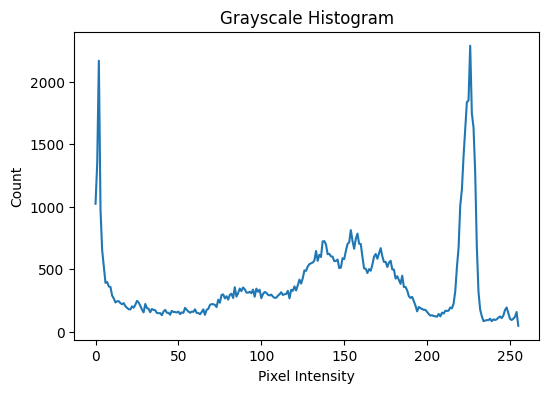

In [ ]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# gray histogram function
def gray_histogram(gray_img):
  hist = np.zeros(256,dtype=np.int32)
  for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            pixel=gray_img[i, j]
            hist[pixel]+=1

  return hist

# converting BGR img(loaded in previous cell) to RGB & grayscale img
img_bgr=np.array(img)
img_rgb= cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

if gray_img.dtype!=np.uint8:
    gray_img=(gray_img*255).astype(np.uint8)
hist_gray=gray_histogram(gray_img)

# plotting histogram
plt.figure(figsize=(6,4))
plt.plot(hist_gray)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()

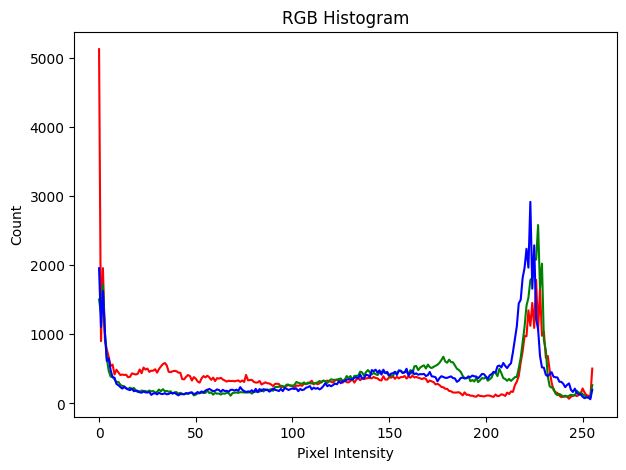

In [ ]:
# RGB histogram function
def rgb_histogram(img_rgb):
    hist_r=np.zeros(256,dtype=np.int32)
    hist_g=np.zeros(256,dtype=np.int32)
    hist_b=np.zeros(256,dtype=np.int32)

    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            r=img_rgb[i, j,0]
            g=img_rgb[i, j,1]
            b=img_rgb[i, j,2]
            hist_r[r]+=1
            hist_g[g]+=1
            hist_b[b]+=1
    return hist_r, hist_g, hist_b

if img_rgb.dtype != np.uint8:
    img_rgb=(img_rgb* 255).astype(np.uint8)

hist_r,hist_g,hist_b =rgb_histogram(img_rgb)

# plotting histogram
plt.figure(figsize=(7,5))
plt.plot(hist_r,color='red',label='Red')
plt.plot(hist_g,color='green', label='Green')
plt.plot(hist_b,color='blue',  label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# RGB to HSV function
def rgb_to_hsv(img_rgb):
  img_rgb= img_rgb.astype(np.float32)
  r, g, b= img_rgb[..., 0],img_rgb[...,1],img_rgb[..., 2]

  # maximum and minimum brightest channel
  mx=np.max(img_rgb,axis=-1)
  mn=np.min(img_rgb,axis=-1)
  diff=mx-mn

  value=mx  # value= max brightness of colour

  # saturation calculation
  sat= np.zeros_like(mx)
  sat[mx!=0] =(diff[mx!=0]/ mx[mx!=0])*255

  # hue calculation & scaling to Opencv
  hue = np.zeros_like(mx)
  mask =diff!=0
  r_mx= (mx==r) & mask
  g_mx= (mx==g) & mask
  b_mx= (mx==b) & mask

  hue[r_mx]= (60 *((g-b)/diff) % 360)[r_mx]
  hue[g_mx]= (60 *((b - r)/diff+ 2))[g_mx]
  hue[b_mx]= (60 *((r - g)/diff+ 4))[b_mx]
  hue/=2

  hsv=np.stack([hue,sat,value],axis=-1)
  return hsv.astype(np.uint8)

/tmp/ipython-input-2700519829.py:24: RuntimeWarning: invalid value encountered in divide
  hue[r_mx]= (60 * ((g - b) / diff) % 360)[r_mx]
/tmp/ipython-input-2700519829.py:25: RuntimeWarning: invalid value encountered in divide
  hue[g_mx]= (60 * ((b - r) / diff+ 2))[g_mx]
/tmp/ipython-input-2700519829.py:26: RuntimeWarning: invalid value encountered in divide
  hue[b_mx]= (60 * ((r - g) / diff+ 4))[b_mx]


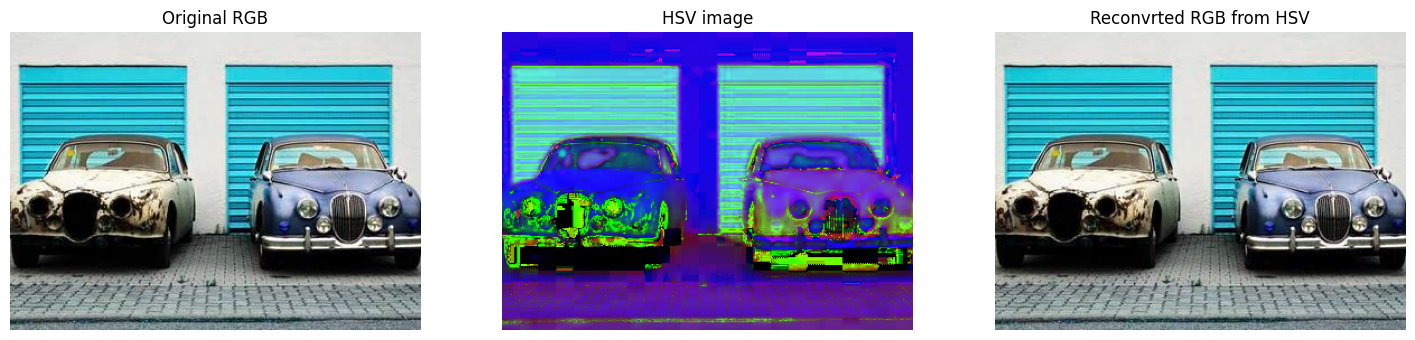

In [91]:
img_hsv= rgb_to_hsv(img_rgb)
rgb_cvt= cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB) # reconverting HSV to RGB image

# displaying both images and comparing
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_hsv)
plt.title("HSV image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(rgb_cvt)
plt.title("Reconvrted RGB from HSV")
plt.axis("off")
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

(np.float64(-0.5), np.float64(366.5), np.float64(266.5), np.float64(-0.5))

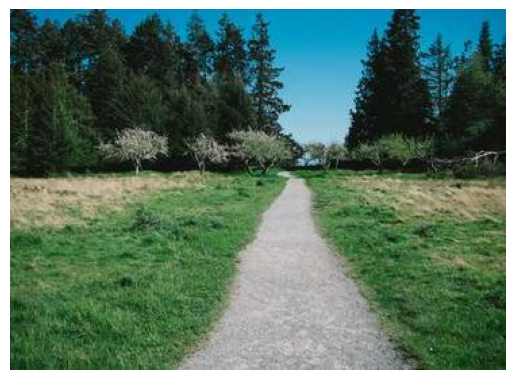

In [ ]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_2 = """
/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAG8BAAADoAQAAQAAAAsBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDE3AP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAQsBbwMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAACAwEEBQAG/8QAGQEBAQEBAQEAAAAAAAAAAAAAAAECAwQF/9oADAMBAAIQAxAAAAHyDkjeW2yir1+LU6pRuNOonuHpbp4tmzTlM+z55pyp8vs3ZpXfT4wAK+OmittLXO3OffXghEt3p7r546eWOngeLgeKCMnV89w9nXqNrzezW4u+h8gOLlDirZ22AauQsY+b9eYiM6YCjJjpU5FsPRVDeHMRM1oXsc+nHToMRc6PZRayrYzX53o0a7989nob6/lr5nUvmcL5nC6Ol5/n3uYtit4/pFq5Oia6H5Hs+brcmzvkrNtZ/H13HZ5RSAbHk+gKbC87GXpQyYnpyFtU+Xbk2kWiRiktWxE2alzUdWtZ+uZshs1xWausbdzO0vV4Y5vbwrm8K5vFTzno/KcPUmILye/tHOtXGtVdX9PksTC4dQMfP3Uo1a0XT3LpEgwYuyEiEsTukxLoYUDDqr5FcTqrvEjQoEnWCsZ96W5n3qfXlo7mLtduBSyN8g4+F8wTCwNLK8/sTMdx9BvWKah52j14TS0MRW2qJ8er0RYiuXGtZyyq2tsYzFS0nWq70nq9M9IwlskTJottSlxCwAXYGKvdDLixv4Gv15ass7rxXDeFKs5i+Tour+b19MdnZ8PBXqWnrFOsQZ0XTyw5MSG9TIrtDqtup285SoyWnFidVL9a6vnR9JkJmw5BLk3Sum9RBdpXTHH0NcT7Lxe115bfSXTmHHwvz3pPATWXBDx9Ecx+ZU5o2lIcnCQqx6omeT3XVgoVJJDxLlHI9TAmb/VLF3qW8cl06kUwsa1Rs0NXA0zQoWba4OjQsRebmPmb2c3hu15Hc7Zs2fOxlv8AhtmpNLMW5OZmWsxolXIpWa26MiVqw0La40adING2GWOeq0xT3XyeZPesR5QfVsXx970NtPFL91K+Bn2D68VoepGXxZ+prM+bPc5nKZpKZrVN7YrydnZzKqV9F+ZgJ9M908g31YteWV6dyeXT6QLMG3eWtONKlQFzIGvaivXrY7l1Q6XCjrNHlXGrfVZJJATMuqombQ1emHdXFHV+m4Os1A9Lmg61bV69JytVGt4BLnjyNimw46lm9CkQlKxENVhtxSKtpyoKxWlr8yzY6KzUd1awVQvJQbFWvI5iUsW6M1Uc7KtazcNKsrJ5NmrK1EWerFmMtVdnpuyUd26zWsKjzvWqnDkAM6YBTgplrLKa1H0ZdL6a61tMpwXlLqLZmrCOLHK8dTszQHUXwhkgw44pEV9FdV3VX1NezIJVmQUcyZhoG1a3aGj29HdHbsxEGZl+iyOWM9LgxxFtYhjK6rb1Z5xm2CO3mqfkgWHARzLqt0xcNC0oS1kSItLkjk2ErMaKmpyBdqVBgEhrI6DczNjfW4Ud06lHQcE8Lq3EmLT2c/lyqA0M8xU4qGYZDbFV03IsY1Wq30M1oexUxDLjpNstdnQjOrAW0o5Hll2dLc17OXTEAwPJPC22xtZ+n07FMd02XLhGCEwai62vmbCM586GpncuShM2QYUQPCxeW2pVplDo0U10l0syzVyFOQDWckiTYTPDbMJSl8qjoJiAqyAwG5N+7v3a9jr2iZ7VjjWnSsiQcohL1GfnbWZzzlS5WeJlVsqQh0OTAJ0rmkSaLp5iyZYwZhYmCMEXSsdmvkuLXIhkMoDBoUJNbOjV1N9XkMddt4AGDEk8ogyQ0BbRFVLteTMo6SuWMZtmmzdXXhGCLpEcQUQJEvylkhFIDFWJWrNkRAu5FWSGGHXNRaJqNuL2ujLIN676CmpHuO7miT6RMurBRAnKOEqZmpRzKy6588Rza8wS29CV2FaCfDaRI5LDalqIbWZDhTEFYVFl1Sn5rAUOlhg6t6NeJdehjM0XSYpUwFMcAwFlpUCOq2RAUxSBUeKZFbZxcnRVfy5wi2tmvFitbwmZ/8QAKRAAAgICAQMEAgIDAQAAAAAAAQIAEQMSIRATMQQiMkEUICNCBRUwM//aAAgBAQABBQI2WR6ZXDT76HJUyZNpjbmxXQnWDJb9GNBGB6OdR56NwqHZf+fq25CzC6p/xvg3MeUBe571yBZ3GLHLCdip1LPtMbWMj9sPkLxYckHMyGI1mZVp8WWBgZkaopbf/ieI3jISXUWcOy5P1zNqmI3jmQKOl6y4eQeJVhZcExZOc2XuGuMbU2tFMnv9QxEOSenybByUnNemcakqxQgZf+PqH1mdlIqoGIOJyWjtR6+qM9P8GNQtsfJHg3Ll7G6lExRGl10E+kM3qbsWZYre7IWZjqMfp9CzhRMeNDFdWMqVKlSpUqZwL2KZSfftZwe6OdULhiH2eY059T88BjszQpXQlZ8pqZYBQNldsejWAVjcdOTCIJW8rVzqZX8b5WJFVjU7HE0QO6+nB7dSpUqVKlRnVWztB0ExWIMDLGUJENF8xKd3YZAKU6ANG8mu2nA8ENUIa71dju0uNVa0eFFwC4Z940Z19xGp2RbKpeQuaS4nqDE2IqVKldc+uuRQIJxAIjmHM15NhEx9yPYcvH+PKovS+DK/kqOTYO/UND4+iBRSKY3moGKJveD7ThiTAD2ED6pkwAghh+ldPWZirPk26ibaxc3cLk3uzPmyMzA8ho59usE/qDx4M+yNeo5lwmCMogonWZByH5X5ZOCGqYMlPndDMRVZhRc0x4xjT9TwM/ByJqf0xGnaAHHjvnoOJ5H14H3ALhgaOOZwB46AmA81C0BtNeh5himBlibapneYc6un65L0yZL/AF8QHlqmRieniE9RzBQS55lhXIE4aMvtEHnx0ujcbmEVL4EIjTzPBViB6fJpK7rp/jx3K/Sp6nP+Ox0I/UGOQPTE30vj9LtPscxjzDcLNU8QGprYKQGFjBzPMHk+T56ciYxPTMMLjkfr/lSBiBn1+gcBB5PQC5oKNdBzD8eZ4lweH+QYRgYlXgwBSuMUcWJi/pjHxsq/QuYsJyOympgxY6/HxFG9PjaZPRgp2GQYvW40Qcr+n+QzLm9Rx0CEjsRk1OpvWfE1xVwEiFuei0I9Ge7p5KmoWhFlcIyYjjGLJjy2m4IGtlik9bfRP5Ji9oABbL6M2uA7410OxB3Ij00yrz6f1b+nB9VPzqmT1QCfk/xuP5MWDuDsHYQFY4jIu9Iofz0s/oV4Il8A9AOn2rwusTIK7zOEyIZm9RQy+o7qgwvcGWpjznJDqXL4g3eUouYWSFfuUNxFV3K40x4DuZlye9TxfvGTUK4aOW3GYQMJ3Ft2BLIxmpmjGJiYx0w4CWU5C3u4o9PM+9qm8LFZc2Muem22KnYk9QDMNgBis7rGWWZCVY46hDZIcZpiRMGftE+uyd1vWZcjZdnDYshhRxACYA6whmNGbMEi3CagbJXkfTMN7uECf61zP9bmn+szxf8AH5RP9e5n4ft/10P+Pn4NT8FQo9Cuyek1nY5b06kn0KB+3NVWMFaPiDhvSYzPxEUDCs7NAY+cbU65O6H9GxjY8iMyPFx0O2YuCx+PU/GCxfRwejp29N7j6UCdhiey8XFkr8fNOzkM7DzsNDgg+O7h1ysSTUGRIMuNxwZ92L2sOwVtuN23347ovvGM9jurRg3jRXjAMmPGEmgnpkoT1GCzOYpYHuCWI1pO8hI1muxbHQI4Audu0/FydxMNTtmdhyxwEECm8G4aMYI00x0CJT2hNluSTsTRsal9ZsTLIlwmptcsiHYztXPAExYdz0y/Fz7hZnuEG1BztfF7y6lCW6wZLnicbB0EapQB8QG5tNwIHhZGhE31iN7ieNje63k1jkKEyALZlzUTW5Sz2kroJsJtPrFj3gFDpl+LY+aWNlAgzGtoc5AGXlMxBtSE8bJO4VnfBNT4R9TCwEV4uS4dDApKitSFo6GaQ5nltXgF5lICrkJC5Z3LhJEOep3dl3obIwA58ReZhB0lSo4sOBCAZospBOBGRAKMU9thksVZ51J0lzdDO8KbPFz7RisGXSd0ahnhYzvPQ2D20LOZzDsJ7mbtsYi0e2TKgc3a1Vzt2AiLAIOZiUlq6VK6ZlqE86rO3zryFhyFZtzzMjusQ7wLzcHi5wT21aaAA23QbhtuGcrFaGXU4lcbGviXZyU3oDuTSm7esUVLg88xeZhxV0uXLlxwGGROTxNuLO28redhxFXWWs1R3siU9mXzutFhZUwAXxNbmxU2ZfEriqYMBDmAivt0JYEb2bKWpU443A4EQhmxYVEHWupmQXHWanUCp8YX2PdqWKAQMAhJBUWao6nZgUcReR23sNc2WE8Fli1TKegHOvu1nbqe2xD7iMdRvjsTLgJEs2vnCpA63CerCNHSyfbCTAaj6N0oGagqGEOhndQSrhLQA9PMKi7IFmA5LDbTzOIfJJrcX9HJUQ7HyZYm0PmY1Jighf1HQxo8dd58Z5UXNqgdDPB3YQmy3baK3ts37TCwEppVROJSiEVL1G3LMxmxBZiQcLHIgYJzK1NCcLAeQ02imYxynj9L68wiEbKyRlo2AV5lEyqBXkDg1CFmnAyADb3UwJe+gm5hY7WGgE1YxWWgwsmDwPJub2Rq0PAp6HIT3HEOB468gi+nE8dciEFyK4WB0isLJMsGbTuimyY7BE3hzExfBU2paWa+QupssDQcgkWQbKHY7CKbYG2hXWNxBdr7oo5x2B0A6GfYq+epngEjZ0NlDSkS7nmUIXjazgQkmHHYIcA5IGOq+9aIV0MJ0mxZEcqdhBxCRsaI+zxKuamA+0gUvnCkrpc2lQgWZ5nNdD4KmMvDQg66gxMfJAEaoDweZz0upZUwSqctUGX29xbXWPRgImJqBIsLuTdmqDS579VojEsWffTz04guG1FmE9NblVCkK8tDjs+5YMk2MvaXLuCUZySvwAn9/LazWHiC5rcYQCCoNb2BGogWKeUWYQZdjpRPQCamfVX1qeILMI4142YSyYxN0BCAJxCoBosaaqjrwSwgPtNT+xPHyHbEBJW6HN6tKEGPkILucAqBExmlHS59HpdETibcLxD5JNXOYTcNiZVae5YDYNCBpuZwZwYSwPmbTeB/bvB7gSRA3C5CAz8EmWIeQPa5n2AYuM7JjE9tQSxNZU+xtPM4v7NGCEUT8jxCejDaPit2xBYpj8NGaAw8TmEz+qwzHHEPEHyPxT4AWf6Vwv8A5YyYnjGIvmARvH2xIhMHyWH4f2YmwOBHY6ZPDS4puN8UP8fqHYDGSY3AlcUKM+m8f//EACcRAAICAQQBAwQDAAAAAAAAAAABAhESAxAgITAEMVETIiNhFEFx/9oACAEDAQE/AcbVM/jNyZH00mzT0MezW0c2ODyxRH0tR7J6biuyGncDTjcqZqaTgRhcNr3R6SGUrNVXFpllkVk6H06IxpVx+nHLIq0amjnHFmlp4KmfQ/JaNaOemR01CI4tFFFHp4XLs0dPFUjXVxNLTy7HFo0NP8hLSuZ7LZn3Zfrgxro018kurIuTRqQ+62YmJiemir2mrVEFKxQUpdmnHES9/Eo0S9iC6NRIooo0opbyikzTXdorysml/ZRQokV1vL3FxfCuU4lFEF3tfgfjaRSEqLK3reiiiimdlM72scjNkZD/AMFL4E2dnfwX4LLMhzMzIveMR97KxMveijovZl0Zjd72XtFbvrdNlmRkZIzMjIbLL2vZli7IreS4IYkVtQ4mJW1bVvBcZQ4L9lFFbVtfOKpcWNbVwtlj8CXNorj1wrlFeBrwVwoQl4mtr5Xwir8jW9n/xAAjEQACAgEFAAIDAQAAAAAAAAAAAQIREgMQICEwEyIEMVFB/9oACAECAQE/Acqdo+dJEtdIlq2aWrijNY5D/IuXRGakSnUib+tohqKQ5VLl+RKokHUut26Qnascux8M3VbR1MXZOeXZ8n1o0/rIc22J8NSVI1JZGnLsnOkJmpP6kNSoFp7I6riib/guyVJkJKiyyzWbraL7JNUZuMSc7Zf88bG7F+yb7IWWWWTb3jK0S/XsiLZZZY33uuT8oSL2k+tr8Hwrn3Rk0W9mhWLhaLRkWjIzMz5DMzMzITM5IeoZmZmZmRkWXzvjZGP+jVleyMSit4rd+NcbLL2sRBbyXG79o8ZKvOtq4xXFqx8WhLhe1FcI8pLzrjH2fgkJeDQ16IXk1x//xAAzEAACAQIFAwMDAwQBBQAAAAAAAREhMQIQEkFRICJhMoGRAzBxE6GxM1LB0UIjYuHw8f/aAAgBAQAGPwKYyp0TFCKo5gmeiNvsyT9xYTapDmftWKuhqsSzVJuN6lJPAspzw5eCqy1avY2jLTA0mtLf27wdzT8o/wBlE465yTpPBcp7n+SOpcj2Jk7rHbuaP3Lwfk0O56pWUUNOpFIv9pfIsPNS4mdmDw8kuhIvnUjopf7MzDL0JuuRR+xVOGxcndR7Dw6ZxrebkvEkyE5+y26PglL2JSX4yWmZVyTC3yQrZasn3aVyLDqyuUvzmxpDV4KKFl56EbTyQUmCFspLlvcnjg1aR0oiq+wlipJCxJ4dujbu3PUxU3NeLcx9pbbKdM4Wce5co6STJSgqnp3MVX7DxZRkjztmlpylJ0uP6TTdKEPKo8CVLSNxPIsP6f7k41HjrWHEp4KLKmWlOjNK+MQsLUd0n9rXI9bqcZQzz1IpxuUPOS3K5XIJGyV+GKF3RAxGHFceOf8AySk/IteJ/wCCU5T69GHbkcJdPowmG97DSw93nYvOcLornGw4t0LKVlDuTJKNLPGVRaiMLSw+Crac7Hcrujg04bdVjE1haw498fROxQvp8i7ni7tz6mKvHGfnLjp8jOS3QspJKZOpcvkjC8RKwTw+CNbwvDzYWrHh1bqep6bkY61lYnfrTrBVz03ynLzk2ShfZjorlKqbQaYw4Xs7yfqY8VepPFhb+m6M3T26tjDNcX2OK5Tl3VO346aCHP2WnRm0eRY8eB0JVupK/v16dMlG4ztltlYvuT0wK8kxa5DVJiSdGH2NUVrSSfpp8QxNrKxHpKq2TeqSiYpW0CeD/wCmH4/IsP6eJYtkJ9M4bJR0XH4LDyv1TvnUosrUPIk8aT5E8MY0tj0xDrQdIZ+Bu6E4KES1iNLwunJytUOBtPDpTKNRNB988EXO5lakRSORL6nodjtUliVcf90WGoLw0VSEoTy1SmKTnOnTRdHBJDy025FNT+D+6hX60LYX6bO6+VFBhtMXO3Yw6knqVUQ/pQv4KSaZlndY1bLchvDBiw/STxF+9cnpjyNTEIril7D1QXhCrI45ErjLpihExQtlEI0uvKwqf3NGH6GC+52pFznKuVsrdDeG6wt2KJwVzsaXgq3uUoQ2SaldCrfwYcClPdMUJwluyqJX02/cxfU/S+dj0KCbtuRdjiCuFlmelwWLGmMqGpN1N6l/kiaE19ycqNGxsVgsjRiVT/uFMFcCg9OE2+CViuoyh4MJ6UaV9PBH4EnGoVKpilYfgdkxPUU/cpiSXnY160ye3F4NH6fwdn8mlxP5PVhPG9SjxFGy+J4fA5eN/sR/kjQsRX6SP6RGHBpKYCCYoegrhxEFxYmemg6PwYViueonV0yyVVEu2VMLk1P6ZVHpl+BjoidA0sLQ1Lqds+5aB4nvlrWVvg2LNexd1PS3+DRiUPguX/cmMU+B3Zdo9UeYNX6s4R97O36nyamUZ+SZLZVVixpSsUxM7mWKxpL/AIytX8nBd53KZTDwl5yl2zZWfghfweB7ENSThdCuGqPTQo4Ib90d3yUUoo8Vbo/t8Z3bK5WPT8EXHDOfbLde5UjEpfgoVlnHBs8qnCKs26bdN8u15atR2OTb5HL1YfGVEaXhaY+2V4IhlYRGKYIljqUPTQnCSsWXnKcDgeGVixC1JDrlccqeMoZ6kkXb5g8CbVOSiUngt9qhuTJ6MTR2YMU8Ho0vhl8XyeqfyQlP4Zav5L22ZXuKaj/q4IXKFDKZRqFxyU+TVU3yriUvg7mkdrQ3ifuPclO2x6mNPD8loKHdbKJLnPVYoTWSxKJRdo/2WKYWdz9iteCJLJ/k2R6oK40es8ZeEULFU0eosSjZnalJqxI7XTLgnVZQUdH00uTiv1Qx9pEFLEmpEHqleT1HjgjDBEL4Llmisspg+TtX7HI4y9JaWellEz/eV2XO1FKEYWSSiXlS5ahvBAufsypIIhMmC0FSCSyJkXdP5z5Kp4S5VVKihyizLH+zc3LEFD+mbpHqxFztoeXlctlVz9mxNTyWgWdzYmfgqiMRRyiJK4vYhugqkwRFCiKlTxlQ8Hdir4Oc7kHjwVPzkqF/svk7yjosv9EJMtBJSfkUCqhclIK1JVTdo2g5RWqKHpygg3fGX8GmSxSxYdclQ8i6K/YghlWIpQoXRfFlLKNZaYdDtL5UKlybolZSWKrK5M+xKfseSGyjVMq3HSDfKpTot06llQ7pO1jarlCblHcekoVvnQfjKcvGTQoKUNLXwXPY/wDal6Ewbm3yUVi1SuVummdsoGsrFUcl4ytPsUWVY9idywqCI2KEkCf/ACQyR1ygRQhq3IoZV5NE9NCrK51zkssnyRNcqHAylxLLTMkFSCOC9RrfyTySttiShGJ7nkZsSOSlSaFWThsW6b5UzqsqNFWUJysRHRRnnojELFGdSRtO2x25Io7ZT/BWhfOUoHP2KMucZ3JRwVK4WSQVLkFOi9c5HI1bKmeluhEFY8lu1kaSiJ/5Ex8dNIKFEXyZEZXyicuCOdyj8Dmv8lSYpvBZxl5KZzYkfIy8lGNjFiRcngWLm8c5U9jVuVtlPRYmvseChYvBB3Nov0Xzq6E1jwjUnBEn+TnreaH+c5Ge4/xkxDzWdOl+MllJhe4xi/BJiL/YR//EACgQAQACAgICAQQDAQEBAQAAAAEAESExQVFhcYEQkaGxwdHwIOHxMP/aAAgBAQABPyGwdDgJlLAvOIynCYwvPUqYurzEsL8EZfQBpi0FeEnEK+lQxl5qWtK0y8/SoDsIr6Z0q+mGBKiWrdcRzW5X1r/mvrQSzvO4hS2poYXUm5Qs+lSvpUqVKhehV9VKEyGWaxcVUKvY8bhSle46mWEY+Uo0KcG4909E5gY8BdkAi7gghy1AjrMuAvdyy5vmYBqo41d8ggW6fNQ0QsAUWr+IrvbVBuI0NzsF9yqHQuuZx/1X1oLZg+jDK3UyoEN3XaoqRm5KuVK+lfRHRqIS/P0xJRjyjl7JXcqMKXkQov4h7hK/DdTZvMWaWpzvV8wbR1KdHwgCboxqqK7JR7eEw75V0TNqvNnxMCZPG5VZWcszOPQ8yoM26uAMnHEZa2MBX7j3YO9M2kTHz9KlfSpX0qVEFe+UXnCjxKpUL2cS8OvMuCUhY4lRTtrElSy6xfU6HuIqUXo4lfUK3ldQ5CTJq9Skp4+IP5jwddQS28oiuhO6qWVBYYsrLcXgWeSLe5RMtTo+5Qmae7ikUXZrZBJPOvf8RwzGiiq5YW6A8XCpaOsP7iSVL85kBsDZGGyO+f8AXEQ0bqV/2A4Q2ZXlqLAHB2xC0xzhqYWDfUrwltqCxFPEMLJb3DPQL9yoWbLbljarSGCNRpRCFe+WqnXovfcxSnsMdVVp4Rzu8wJ3VZ9QdZu6gg53vUvS8d1FE8FuIr+ITge3UO4CWW+pwVnmo6s7mbeQi6ZJfDK9S2zCjWP9mJF2bxKHhfFtfERksV5ZqVXGdQQyZ96lFgoozn5//AA2VtVMTHSGEmWHO4lPE/xIqiwYKxUuKr1Vceph/ZlxMwVtg0TTSnGI1QRCKtkKygpAOAEW7DcFlNtalFF+NQpeIyR0z7o57v5QxgBWkPIV5ykLz+fMLYDcCut0cR9lPbblG3hhXrAeZYUoPHczwaCquXxdgdTRezmyUwXdms0cxskMYdQdABVXjmPLqdiVSt5d/wARVS1wM1/yFSoHYDaO6lTYcJKXmNjt1AvdQxuGTuUdt8Lv5gDIuCeBTKd3BUTbqXNG3Etxl1TmxeI27seEclgalbYDioMUa8QWRkhQvG8R9XJ8MopTGVpXlUtBqONjAHY+0AQZvERiXxcYTlD6QIOzxHsXcGo50cwI8YKn8Sm43qmXdYPKQaBcx6lioaoa2lQ8LQGFXAqxB7zC5uQSpUqV9FSkReWEuAA7o+g+LgVri4do/wAyqKmst0TJ7oTmfeKXmNq0igfNCo4Je0VnieAEVhGu8SlHnDKFXx9AH+CWNrzmo3krrLT1O5WbmPUNOMTSjdHe5kK4yQIfslDt7hBoOLjpYgwW4hGwmuqxKCr72FULlmoJgsj7uhybfUGvn3YIq4i/e+Yeup3KlSpUqZiJrNEYPa9m8zkD1z9DcFThDXlKMXbCOJhW+gcyIFWkwvOZ+Zo39kXKHmV6hfgTlHbqIvvPjJKLvlKWi7M5jOFo8RgKM9MK7SBYc9JEUI4nh8RGaruM+DMtd3PUwV+0Cl7rzFVTDuYTVxHerXE8yi3ipRKNbE3OY7gN5TAA6ioDORlN2rgQyD3KlSpUGfMcXG3g2DAi3yvv6YrzAQG5ZygFnUeA3JvxMAnK1nzKtWMzJuXzLvMY607qWeV3jqIWjjUFy1+06m6qc2fiAXLGWBuL5vuJMnHUqlhZ+pzZFbtMKZ6iRVY4Zex9p/6o8J4i4L5+0SN4ghYTP+Zz+aJQRyHMtmWYtjwyosXGq/f0VKlfQw1WDGWN9Gxlx1OfoS8VFxCVE/C4sJsEKI6euvoeyVcarE3MFZSOj/ki/LzKIGyCijJzLxihKqbDEw2gDa3wR5xuDlx3GR/VwVp08RKV3KgZQDiLK5dPP0KaNR5qTi42Vi7LgZ/CjLTusRry27x7Ig8y0ypUqVKmECWq28MycW8zJt/ywQtz1EYexmGP4+nfMATydx0wfRfAixFWzJOwxptzKue6xElq1iIB7/UFY0aipaeg45iHgjn49ksKnby8MeWAojluIE4V2tbjIjjXMr5Q+q6jG1tC9+53qftEzmoNgtipQnZsbfUsKFDLNkxApwun8MtFbrJq38QQtee/maxSl1KlTUaq1o7mA2wljDnuVbiOHgagmuSPxHB4XKQW7zLJ4RvDuZBYFgbmOdR7Jzx9UHIavUdC2vTADQahkhVdHiKhWl4j6dt5lHk8nEtGTRsqEeFTXcrfGOHxDgAxffEu0Hawj9yLQ7GFVCroblY8OoSuQAjz5lckqh6QEpbjtFQGLplpJfFBkvZBHl+yDDtViuYGTLzBkFg0kwTit4zPbevb7nH2inCRIPuEhfc46i6AFYWj0GPU2uggSar5r1MQcTcZo4pqEYIqviKFUVW5dVVM47izxzMePiLToRbn6BElvIjG5WmG+xgXf4jsrDog/ZFa8GMQ5LbqMqPYNYmGVToov+oIfZXWTmBeT828y5Mko0semgNOKTrDOHAcUYf6Z2X8QWGpXm+5ZWwNs+4nrSWr/wB948pJkoY6Sui8xeYqaK5lTks3qUbY74uJUJdTKN2Y07uAVqTBYSyNy5MoDcN6dTYdQLf3CMZjlKLEKb/3MQM0+YwkXe9QQZG3U24D1Ful/wARw+pUvcaTLiJZvTMRrLMuAG5blnnJRBOQ1UfC2viAQzDb93K1gcYlFVlMKzFlc3BxB8xKrO2XPBjqLUsnOKcxbtZZadpWVklwutZiMdrO/pcW0JfUyyoUjh3/ABNv+HMSCkNVG4Ll3BdmzMGouiynbL0bOAONzABQ/kiebfMVXMVRk1RAs4mQq6/9hoRzStQKiAGILYTySmBJt0Wytxsja3LWrTUV9+OpTKBvxEsKWrOvDLWuj/7OW2OcpgO1ySkzVQehEVwun9TjGuY3knuZw17ueOvuMVWeWK1BrqXaKuRIjr7MTvB5IBUni5loKdY1Ka6taIM4Fmk1HXxPmxVCGjwQ2uHG0UUPaoi8MCWQE3AXoMRNMug/UwnN8I6eNAuKFYJS9xQxjlqHY351I5p8xQXy2nTjqMb9i0y6HQCSyt3wlVBUFDqWTcq4qKVyvm4WpyBlipq6IE5XE2h56Zjdl8TCje7Ig0aIc5PMPELsMxVq1yyge6lh0d8wgoOf9xLEsXcGpSzLKSHuc1lTrEct1KpVD1A6J34gf6JGkFdRjVFX5OIZ2J6lN4Bi0mSHx4mr5GsBaL9EztyazC4oU7gqCc5Iv6NoPTRwQdLwi+tPoF4jzMZNPSQMxtj0lyqnFTiUPlURqrIX9tQAS5tsiHpe4VN2D/aCU8FxzCN1ayVUdP8ADTB0urhKLpHohvAt2Qz80y6Xhgmc08UzmgvogIul4uIvkYIXoz2P5EdNeGbafeJhc7rDiOsho3N5QO2GZzWPDNyz5ws5wzKNkscJli5PxUvW0Picbfi5Qy561KpsLuxgpZLWYmrWbk/lAoowECWKs+pVrdQ0wY5hw89PpQeIPfUAkSzHMa8XRzLPPXgWUa8NLHNviBHDIaSgX6GVbUNjUqRPZDbxLzbzC1fjLxAGT8RtVGasjuLPFwTKkYoWVe4ZkHRG0qifKWXqmZzaH2TNs7h9vBAuVc+Zg7wXOwHPpChcFWVK1nbwQUsbJXa7Pdyh1JtjcK9rifQpyS9xScrEcJTHlf5i9R2wwDR9LI8uCNar+LgBVefcDSxC9RibwwvjROzEoQepVQkL6XX8SmKmzRJwFj3BWSnJLr7QqNYCjG0LTnN1iAcZmnuWfeEpW9lQewDUEDh3MRzt3qbvndQUgrYRmi558TOKU5JqtdbihoqvcN/QkuDR4ZuNOauKYz9oqsq8JBJewNeYdDa6wamZSlalaFhV8w8fKdJSwdNMc8bcNQSfUTAG/JnekSsam87lefqChe5arpm8+8qf5MQwsI2U0O6snkjwRVzwCIjMArwQKfM/gigUvUXgp7IfVuiFt+yKOTy6IExI9RAx9Oohu0hpJvjUvNKPMzBovolJHzIPHyYbQbPlBvV8QdemSLK1TzLs9A8pj/JRahDkly4jK37Nz7mDEFuBdJPEi1B2g64iNBqIYzXmZS2pgQ64iFXOUD7oVDiU8xjCMRK4QGuhH9iiFCHm5dzE5mde3kZQCG9DKqz8xTyKryjLWkVli46u0oVPREFC3zqU5D8o0vCnFxMs24Jrq+I48NcTEt0uWmrvqMHCYluCnDKNsjyQVfakteMllXl3E1MstmlD1DWXkSuVdjuOLPCAW5C4FlLBYyl7Qy6lE2WZlCruy/xDLBueCeBiZQLxwRF8KWz4/T0jlEQDKah73Uw0VMKdDEcJg4NSqCKjWP5gCrHouDR9fhBa21kGFCufJBDh6SAs8Nxw7eEuAAr0qqIMAclSo5/GEQFjGYqVR7MWTsNywu/UrbMrk7jVW6IXqyLUg23WTEhztvmm4hF+5ggldI/SOcsE7ds5m2gPCkCYC83xFmKb4hF14o5l5j+cRLU2HXcNjDo+xcw4ma3AEq7fMVHEo2bg8FShxMHGJRnMGc4nyot5FkUyBbzEsvwIl0Uea4i4Eg2M1D05glg3w9Tid9wSgdNytl5qFRu10jnUW83uElpjzLtMXdMtl7UbCL4IlsY5mkad0zEPTxNJsWrrUuLaKCteVRN404h6P6zLP74c2IJKDHmKQrvVwi35BxOBg6JUVV+Z0HnY4Yb1QVYUnzAtXrxNhou3r3KJB3zjEodrvU4l1zMvJGrLZdHMKTzMG48raPknxxKJQbSjQQuS7lCx9yYlb8QB2/eNY4SlvX8MLtuOCCcsMGw6j+COYGxh5ic1nMJS4LSZmLI9CbIb0h2mvcvEYJf3qBaxoNS9LVlMVfcWuO0poRT5TsJbUAU59aZXWGSzxCva5m7GaauaLO2Eyz8vPqVErhTDg+fMVtQhLgah4uX5g7lmo+oqq+YhimPAbgvBqLeA3EQfCR+bdZiA7OiMmT89xWSUbHmedGHEyycu44xRhmVD8RtkO1agGCx+I1bg4blpsc4idr1IFd5Hhl3hwRub4ajYGY4rEBZod3Nu16qGoufxHNAubSh7QoWmaxGtuzZiK7U3rI9cQHYdym3aZHsNz4HqBfD3cBTem5iVlVVdSu631PCnuJT/AFE/xgVaNzLxLVRxNtRt6+eJVQaguz4ZeZZ1LhoslsjXcygv1MVqn5gKy9LWo+YO5iU1bImh+JiByajsJz8xSA4+IUyuTHNRLw3LobjvxBoDxKtyYm3D1UqEfRqajCsbGZsYrQzYlX1LTI4jqW3vG4qYxupa2C/iPRRrMELj7i1kaCw/LDRd/tKr7Di4k3T5jAtpwQTYN8w8nPmXvP2Srb4Sk43EtXj1Era+8sBrKZF59RdKi41cc5FPEzxTk7lpdZNTgXGblvi1iWvNjeZsjsSouaiNpyE0SV96lHc0rfMaljLWJk0bcXqMbu3hgbYYhi1vCZhxmnuFDU3uZ0vX5g1uOdHE3jjGOZUnTmVMDkM8zD4PvUySHV8pRo+6OGN/ZMJWRRhKUQUsJaFfPcNDsljoiFlpcAo+BUskADaWjX7gtQC6rzPk+WZ8j8xxS/xPYPcoFp7iHVS8VaWWzUbiqS2+9RdqD1iYE2xUva3lqB7ZSy2XBIhTZWlhmlDAWFloNwB3dvVRCxli+EySincBX9jNSFk3fcZl+BzN04mqeCIUGZUW37ksZ5uFBTW/EaUBsuUtOCcQ3kOZgsT9S+YtlNRaoa9EyDOQebNzLCoeIqBj1zMhoXpmmfxMHvqDHBccv7llulTDIMp5fMug4T9QIVZmARbZoMbjMoLkmIXOaTV5Imz4k2TORKE4SCqjzcd8DYlCK5asmh2bqZORlvklMFzqXK3KwIMzNVWM6jhMW4ji8BgvzHbljOGos37XFZFvgx8xgZNYWpvPeGD6AmwzAARxWmIPl+ngjwcU1crsrxBaeXUpsIb/APsdnBFHIrbDbgB6zK5cxe7mms/E9N8w0mXqaKjfZLWrW8wVGvcAqs+YHZ8wocK0e4LJXMxHJLthZlKi+WeWZjMGsS85MFwpcuxd1zMQWHUbDVisRVKCjEp6S75gVpmF3uG02NfEz2MYjYmjXcKS91UdgY5SNO3iHMfBjMOzzp/uK1xuIWMVu5VdmWvERwOX4mArp57RwbK33LEqxyTFY2c+IN6pr8zyluswf8DHQ/cB3cB1AHVdzAf+RLSieTUPlRd1oncq+INVs8cx2M12SigWfE5JOtbuLKi/BEyEzW7ZWtvhMReyD8L9R4rDxzER1rEBKoNRQq7OI5RkuCzbBalL77I1rRGsG7+8s03KvIpc11LKbjglKuKSpRe7W5aALcWlTQy25hR7Cx7IVUFrY1iBtgJ2umEm0J3pl1e9D3FZ2rromYSlutRtZOWksiqvNX/qglHUJtr5hlP/ALTKqOu4UOi/Mbwpjxd3XTNkXQzLgX8xBb+6SpYQRhyOd8yrwM0y2SkWU74mZneWUfQNXbGYjZCmaY4x7mDc3xXES37iFiJ+Ivh0QJkuiv4igsqXhi2dhpBXleAjqVhWair6PEpUQwuDWY5gYamqPAyzQJnxEVe2cTHX1jynklzOLuz5mI2t8o91csyvhTe5WU1eUcTARVFUspWuo1TbxDezHYzBhOeY2KGm4LZb8iYs2OMwWvKUK3sigC/iVeg9zjZeGKtYI1288mpRGKbiDkXdQHVHMdYsd/Tlb3kYACvZg1jvybnYy8GC3Rwu4gYZY28kSq774jhsC+5S0znMfgTjCV8QjSYAa/pE/hEwLs3cCzLqCG3v+osz5mMvDG7tsDgYMXBd8/eMJbHExxhIuVRC0YAsHEFJAZ1m5/SiN+IRii16haHMXkHLAJjxFB4hGBen7YsuRZEcmjHiYByhmWNwSgcc4lFY04mJibhDaA0T/9oADAMBAAIAAwAAABDMjXpG0M6+r3u847qs2E2gbSqsd8b5E0ZKYzd465N/XTCZlAaXfKSvl4fKfnzyAgIu6apaPtOytL4LoVdaWc+9+aeoyxpP3fDTN+hgzSeNNPClZzaby9Jsz8MQhkyi3ko4qVl8jWwsixvaU4WAtmVq1gAuhlci2HlhlUF47eanrR8t3o2k5omJHaW8MqkCO4+6PZsXMCcFf+0sImnHCJFYf7jr/kgYYdwLHfM56dSXUfEXCw3CJmn/AEGAVQY/xIA1EriSrvB1UWaovPIm2a93I4VN39q1D4z4Vf4bUczWIhVUhujIdjYfSJwcc1IyzNxBhrFUfrv3lYf51lwUQYTJ91o0N9B43JfMDB8IE94QkB3EvjZkhEculOJLMAk4EgQcafSm2DD/AP/EACARAQEBAAMBAQEBAQEBAAAAAAEAERAhMUFRIHFhgdH/2gAIAQMBAT8QfxVgDomQ/IHo7s/DP+36NAj7tlFZisa3OreXp9/8t4bbaXC7n4Qf/EcCMA+xWXy9FBkmRjxt0dz0G7A2xuzJBqwYkE8luqiTuJCbduDWfjECKTtx1Mg3XzwnV+XfY7HUvlj/AMIMIy3h7Ld29GLuOf8AJNRmzwDqOuuAe+2tGsIwMtVZyJsez/D2YxPqGrSbTj3bOvf44xvtk93QeiJwTNzj5wezw8MTaBcl9jn0csscoxp3DOMlngP22yZmExNl9ixYtdcYupCJ1jyzkRbx3BEl2X+wHYe+C0zMYH7wM42WvyV+W/yPwg/MfUj9GWWiU+WGqSPsXe5h0JPy/wAW/U/wyrbpvLFrf8ROllblz36lY8su7AxkxwkOpYe5F3GrBYp/EMf+xl3aLXY/ZQsfl40tYntg4apVjT7bLrOYP2cvYxL+WmV9vPAepXnC6lRZgcZa3ZxqHtt9u7wAe4z8uzYe2/SMSMKSEHfGRZv8k9lmdWfbfyYwL9swbH5KT2OuK7YHlreSx2/0g2ceoN94PXkWfTkJ2/2OuuO+BeO6PP43hktDJ1wt9sRdWSTA75BgWwNtt/lsJ8sbvjBu5N4I2NjCh+xnf8E8s+chN2884fI8noW5DvGazDP7eHjss1gyZ//EAB8RAQEBAAMAAwEBAQAAAAAAAAEAERAhMSBBUXFhMP/aAAgBAgEBPxAUGG+rFGG2fBbX17vQkCMIfUOE4owg9szO/ioWgEoMzgkbImySWws9WwHf1fYl1ItuIbsdzRdu54dwppbbbJ032nyb7w9DCm2b32ANtCkpmkh9tPf2fYtiXd5Q6Nhq/ZGCOR0he9wGmf0J0Nm7mSAcj26QmbbchbpP6m4gxjPHfnwDn3qOE7LfVZNvOGfY9+LHD3CC9cjkto8AxZ94yZ5DLyxLCQBlq1sO0SCEe5d4d4zlsMiwrGRiTbGN2F9LFkt7ayMPEH743gprFlZ/L+If5fxP+bP3JyDkO4z/ACyN/N/F/MDjhsftn9+Gy8OLX4a8Lu1GJ5LxpbkvG22SXkFZ1alncjnBrABM0uoP2SHuV+yO7OP8SZbbxqUF/u1+pZ1DbA+CLbYZGE8m2fDbROuMFj29iPwe+UZ92nGRdMs8bsZGcHB8J4zQxzhDgBhPJLCwnDgO3bh1BtkMN+X3F1IMnAft1OTHfUlqJbuGCvzTqRHhH3gsOBaku2vGTs7YH/DTvhPLb/LJNkw2fINlyX7jyOwz/gTwJ3ETf//EACcQAQEAAgICAgICAgMBAAAAAAERACExQVFhcYGRobHBENHh8PEg/9oACAEBAAE/EGqLXQD1jSlAcL9ZSLbxz79YPBa3ymQ6EZigMC2C7wwAGfod4QZTdHfdMQeYxF+8rP5wN5HOBEKwLmsQuwGi5og98XvDCo29GQcBvF4yXFqV0JzvrHRIupbMMEC+3k4UYLkG/FzTIZDIyT/EyX/KGPKCKjgfWc2FSGHu8ZpALs7qJkyMRkP8EBvITX+CWYcrliWQ9jwP1kS9AghM1zRa0+8mXrIrV49xyx1p5hgkuyN7vsw0i0iVHX3cmmkdT5ZClBW0W2mbigMVi78Y/sQTzigtVDYiuIHU5LN/fvBBgu7V8R94moosecfABLNnyeMV0qd8ABpO83bQJxzzlNBDbr6YvrBKJD3cOiSsjaefWTaALzn6y2/AdtCgPGAQGQyHjJ6yZPT/AITJjuYUPt4yNSlUe5gi9zlp84qjCmNeD3k/vhSfvkyMRiR4x2xDGKpQpvLW18t5DEIzChOHJM7KbhSPXrLInEUvx4ySRZybnrNwtBh883AUURcnJOc26lwAqn9YxKFq8/Vw0oV8s/vCAhOFpcSjQIdN+jKHOotKcX3z+c2pxfZ4wCTrUO3WOzWgXHs/eSZToRe3WAoBtS1HBesfSvzm+8CkjQu/+vWAE9DEhJL/AFnCV9cSBaRDOdsXyngUHo8zIQRBdR5XyXAYU32eP8fhk9Yp/wAJ6z4Z8gwGkAVosZrHDNvQO5vrYn1jAA8ml/eFhaQ4iZTZrhCRU77wvnT4txHyrXnNnVyseT0Xbc85PsSh0/Wdgoy4fOS0TXcLhIC2t0b48ZQ0+HXPzhtm7IY6IDacp8ZYJI43YZAWJ1HHvEuiqjkPMyxc8qnzcgiLdl3lejUo58+pr5zbyFDRfOKNRTVHf3nIkOq6dYrUFIN3WVCuQPY3h9p2MB434i4wZ0eB4UftMTtSrzL4uQjEeL+B84sJpQRaWHmZIiIii9hNnw845gjSsPL5xZ+AnycnjngwiCARdBOed4r6uPT+T/Nt1/8AH0xVAhRL4wBkSjSjnybwYcp5os/GPZCQKPTeNOHIDt2TLlBzQJGr7JqecmMVsrvhHvBEcg6I8+PrG65Csf8AQx6dYR2Ad4gOtOVALBLB9mn+s0sKulX7xWTKB8w34yUVki2UHjAorZ5E8YoNovJrNEt7TbPPziWBbtTlPGJim6O53ksz2OjxJx3lzmUBpvXz7y4pYcnwuCBXYjy3PeGJqFil8jrGLR9TvAAfQ1ijwdnBzeEDBAZjKbgPA/4xaYkXmLvIkQW1kKc465AayWEG67XL4mhQzU+LHnEWowqxRzfB0YIOyAf/ACxIUT0B7nzr3lwBCcfB8acdJIWS2bfD4yMnIyMj/FzBaHkHy5VLVIpUYvMHCdkQtO3Jwq9jhB9Drkx+sx2JbR84k1NbIscVR+s5oyG7S9cH3mrClkSmpOv7wHYD36u7u/jPN4FjeN73PWX2HIH9GTISuiP8YDpIKqVp4caIqFL5e3BtsDRZOXx+d4oozQIvreVZrgPXF6zUY8C4yKXZkPplB7iN7356wgKrS0HQpMdIbvBQBAhPGFFQfR94o1YRqYCLYgsQ714wRdJzp3jEGLfBx1cVrgTWzu4qS8AMbhykiPlis7ACmgY+vziSDeUnHrAIohqC/nqa6cE7oRYabPZMPPQkHkfcMSsoaYmxonGdMdiiLqPy7xlsEGidvn/7DZAngdFS9UxVNm0j1aeDEApJ4wWpOFHWct5AmXIhqcjs8PvLd0htU1pp75wALk074Brr5ywZVEI7XXRx+M0CCrOpohPGR9K2Fa+3KhGTqjrxMHUhtuo3A4vzlVobp0ebpwgKqLqmAGgWiaxZAGCPC/OJUEhJ/wBuPFqZKEzaAge3vGDJqhADwKb9Yh0UOK84WBA8esYUbpd6wo+VTb4Y0ZA0dYThpoNuMjHi5cIDdp3h0fADeIDWaToPT59YI1v4J5HCbDEi65p9byQA09U94JYVE69/nIAcM3w4y7aSBeSc68ecWlIibOaH+scVeD04Hb8ambyhCacvx/8AHcfHIwNxrVIHp5mBIvRwp0PjEB5u+ThyAjTrC5rC+TzhBRC6A/l1gMCpSx9TvAAmJVPYJ+8av4E+yYJLbgnPh9mCI6NrgXiKeTjA7Bhub7xYVVrSesbEQiPnIOg3fJ0fOOaC+O33j0BIpXxgMgMCeXzm+4DBeT+s3oiiI78Z3qk65HJxivN5wt1u12SZWoWw2jwZUIRUGUypLtotrOsjrNZpw5MQU8lwXcWIkkKf99YIagVNb8uAYEeSMFRVvsylG3nluIIRDzmmR2r2POJNIgNmQUafZmpJjY9xhpH51m9VwA1Po9+tNzlUMqvv6/8Ap9OiGDbOjDAZblpoPHQXes4KaiVQeZm8gC9bxYg5NYVvk86j6y5euCK7Z1h5KVcQdEZ+feGyLqqpSXxz7wa8ldzvBWu3ETE2s9PCZAAqzSylwEbcUM+3BoQR3NjgEhJ14yFbtBf+6waGlIh/ObxogEihzjW8kacZVAsi6wmQtNneXEdjnnIDh5U9cYQqmjefWFVFHnpPVySlonAvvCnIWzxcnUGrWqeseKR2mlxTKID0fGCZGAOx846IAMNc+sO6fnxinTZzcNo91esrBtqwISvnITPLCYEfubxBAokXQc3y+c4QSmicuAA2Cj5P8V+Mvx/jo4vqpex/7zMJk/Ru5rxzLhI2O3lhzjRbt14wdRT8YcWm9nGESp51/wA3EGoEKztR70PrB26mx6As1dYRdrKGoFO3NLnPW8gYVXrIUEez/eEeBjZ38YaFow6BHk3hUaLZc356mcDChotNdCG8HQAeWCf+5EjJUPPWFyh2JrIATZrhMSoXp5H34+c3O2m6r1mkahmm7ccSSEmDo0iz5wJGn4M5FU76ck2DxOE1i9B0d/vNitFqz/pyjRXrnDJDSV5xuA3fw8YmlBKls68Y++FKioa3PO53gWWbiN6vBdz4MBPTzzA2J5rzhy83/wCPtjxCPMNpHmy/nI6NVU+q9zX1jejrmH+Iu2fWa7rPWCiG8iqJeBp4cqEmSHy6wx4bvAMZzjDOS3ifvEbaD3kdQec0GvHVwI2B4/04QpERXatddYnRBzWKonMeM2AMWComSohoGUm384QENQkTX7x6PiRUtVcoh21B+sgmgNmj/wAxjc7Dj7fRikFI6OcU0aRnc4wUaTeuMV1fNx2gY0o6XFTXnk846JJ3U5ywBmAoL3EOvGOB4YePGErScQ0yiepHNB7Q09jrzhVNAMw8B3OcawCIGkf/AJC+ucg6iFgLYF785s8+BHD5yoSB1BjP9f4GOLXHjWPKFdp7J7xiIXjtxm1Nd6XBnG8gla7hjiUpw1jtFeeaOJtyS5HWmz86y2QUEdrp3x9feF0TtdZKEhpPvPOoB3kcIAcbkHokLyn+svU7I84RAkFjF3U0+JX04usmTYVqZ6NmmuaSqxQKGw69ezExWCRHLXHnGaBEpdELNC94+8ZXA7F41+dzrBrL6TDl2QSHeKKhRNdAVwKJTCypsb3vIz3lNwLtt+9fxhT2EzTEse6J8X1jt3POQJ0412ecCuRrrw3zDHq5TIGaC4KROtBo7BeE1cG9UFh2Fc2njWNQQCXV5Pf+ZCL5xCYFVMA94SCDCcl/PzgPhsVNk6MQ8at+sDJyF5MlUbQnIKfun1hd2n7Hv4zmAT6POCrlcC9v84JmsFvnsxSJGjdxxoDlxlwFJwAYRsYNDFe2/wCNmBNFp5U7y5kgKC+t4QVdtc4qhdC6/vNOWtNsL02H6YI0PyOFGe6608YxklJC50+Zz4yJ2VZpz3Xk/OUajCKgKT4aucqMqh0ajhmji84AbS3Oy87Jw5sRDU9ida184uGkExOCHZvPPKtiwNCJBB4PrY+nI7RFjT2vxrHBuchWGwOdeecI6mCQM564XxvIfxQm3h8/zgXdAsYOWzuH6xKdzQTboysKrHSef1gCTWaF5A9e8CrERBp40x95vGarp8t2WG/Dlm16QqCm8QLpXecaL5plgNCXt9i+TGrSqUNODF2FRfOjn4xaEwTJe+fPvvD2EQn/AEXDyHImQPXvNhB0Fs9/8mM8ohzewh584Cd3oHht/wCO8Q7Khs3gJTrHba7VCe8Hi0Lxww6qh+MBVos+8Xt0eco94A7Q+cDedEqd4dOA+c5hAIYNC0JENXDUInOxX4zkJpFbpyYHPkJ9YhKwInXyZpBiaRt4Occpyq3vlz9PnLaynghqut6veMIrQ0AdETo1r2YscY7XQIm0NOjfxndYRLOD0TY93EA2MJ6Oefwc4JEF4qiGQOxVauickumTfQNeBNGISazVIEXiGl/DDzaIK+YXmw36cMn2xCDDQyQzm3A+Qek3eX84dzTQ2NbN98Ewpr4PcNomKmFgYu2B608eMHEK3+znxvjWWaqwBeRN/vI2LGomhkeOYhzlIGI3Xkz4/vHdixkF8vH5csUTWh8nqj+MFGsW0pwvnhgVQSugdl7PXvOh9nMeJ184egC05HT+sBSAuoHreVBALYJ9/vIqXLp2dbkp1n3VAD36mMrU/B/eJh8CFwsAoABa+OMTiF2mHbuw7xCht4NB6H0Pz1jROqTZ7A4PBhBCVp3T7xSDbHWp8uVDU/rIBDwokxFRJwM00WOpiBunzM2FCqVTBGo7P9OLnKrb5zQLcb3JwXU8YQgV2gXo43r/AKYp9KS6OzYc4FEKBDT85ybzauoct4wG4bgsWtNI6LjTmH0vnB9gktAPZ31iQio0nw8nxiNV29sSMghXJ695wY6MB7vnrAGGQIDp+CPvE6gUBVto/UwOi2uiP/Ob9+3RD3MAzCBVPN45fPWM4HQpJIo+jhtFlqAE13V5xhA68O1PyuC3DdSYvSeNOOPaCp9jh9mOstBOIBX3Aze6+zjNE2avb4bcF3lFH7L+MWpHdF5BnGIL+plh2HOl5+M2+DZJ+ezgHNL63tj3gm6AEAUcgkyL0LZrnAQRqPRwfuONNN5eWaHfgWs3JSeGNVFLzmT5ycfO07MQILSaYCAohfziD3R2P5c4ML0xFUPTd5zQib9LiVIxSmuz4zcTKqT95b1QTWLxlwBVwafjIYGcE793Ikz3SW/HWU6BK2Tz4yAIHSADg/GIx3G7FRN+t6wKPECKfCfGKg8il/BlgDI7y+MGAPIdO+E4PzirFZ8yA+LiCc5CD0eMPijsdL/3jJu6osA+dmseVD4A/XP3ksYOME/vCiPLkJ+F4wUb4aL6uNqp8IH1ecUwhoNeXziWhgBD5yghBsEPnWAECtJb+ezBqIKIjjC4GaYAjiDFuGyls8HziopuUR+d9uNGyVg47Llw80U/jH6QOdcD5xkIZ43woQOzxMD1PkkMRwrqob8dYnXSZB9pO8VzoqEacnp8ZJdpjo9F3jK4ETrNEG6dNGEC+KN04FIQU1vGSlPA7xBHk785oXobKfLJMebT27w6uTKrv94BEi1ajJ7VB2395Yv9afjL6YtSiDOBbJIUPTT+T7x4AR1BvzT94zsbCanjBJxFFU84VxLBofjpwg0gWqGdrjQuAFSUSD95Vi6HgnlPOQvDkwpsH/eMdUnI5Nch4DC+65ST5nOG2wggfRxY0QVdfWXGJdjqTXr85W8ZD4N8YGq2kIn6wkgZ5PLrIiNgu48Pxiwibo2vrNBRobvtdZ44vUo+OvnDVT0jYThOnJQcO9J5yGtHQd4CBbUyHrLRybKOU3+oRO3E1YlAb+8EoyI7nNUQ1MJ63gYpQoR/3kAlFsN18mGRHooYKskKDfxlF8DEOPTQUBwOQjhqPWOURJB/BjAUnn/VhwKQhK+ss0F0Dx9magwNgGz+/lw4G8FcfAPbc+8E2ErU/OF5RLQb8ecf4FysEZJIC3zg88GR9195BifvWBbQgjrDmEEA6xao5xopwsTSmMKfzMigApSB9/xhCq3nw3mjgbC1XYpfeKgREEGNz36y+OCp+G94i1hWNn+j1gQ3bzkf9ZcLzDEb7+cNXF2jXzvFjwhCL7yy2Xovv5xJZZDv6enGnaZ4kxdErmfpxYxHbr8PTjdAGoj/AEcTigeY1moV0DzfGdgdGSX+s75RRxhiuggif84mpzyxJ1lLLbKi+PWSmkCEl+XL2QsaQePWXFiTvYnTcGTNzxPu47WalHb3j5BGAAr1P3ihWmrz047wEOwq2feJg1gc1wPDQokPTgwQDkJ+TrNojZCB6+ZgYCJo0p7ExCTOh/vAPlNC6yYk8GBYVHl0cSSYxLTmkYgM1cAas9ZBxexxLKqwHXywcWmTsKC87duGn80T4xeo4E8zvF3vU0U7R7ybctQdDvEqiCFQ9kcYRbNBQZa42yOfnL7sUNfrCTEG2mA9lRa90OsmehQ6fWFhg9XA+8SBhEBsT1khIQSjPrvCqFAlj/rESAkho41ytFNvbCM49l5mNhUlxPrER7Fh2pgivCw/fzgCEGgHn5/rBWhVpWCrAqImmk485s/s2n1gEi8IP1MEKG5qN/xjwp3ZAut9fOXq2tKOXbgxId8Apt0r63rzgAiAed9Y6YlYGr04wNQzo1yesg6qAdev/c272n9h6zZwtzv6wEkucD3/ABk8gbN7X4MYsVuTS+MB42jfODTpkznecqNnlzYlH1goBaGtub5Ir3maogo6KTOGksp2+XDZ0eAf7ynUw8N8/ODUyQAHwnZjIybuBffrDTdeQg+UYfsHs76es3GCIqU9e87RtANnneTAoERSjOL3iqVISWvT/vD7A0E/ExRDOFFXMWYaRoT2HvHRFKIZPeJsXelTFUK5eAmt/OWEWa4L4PUxIhU7ejzrN4yQCCf1gWuStt3yYIcRe6HBbQSEEfZ4yJoATpP7ZqAlbRviYpQdThfJ5xtbICiBeZ/TiAZIjsHhTjFBezNGc8fzjghIVIth6M0vSIVss/eNIiqmlJ+80YKtjzu/WSy7lCf1gjHxt2GDHTHZYeLnFGJU4mH1LDbUckgIOTi5sD8sQSGU9G3LQvR44wcAm77/ALxHSFRWF+cIbJFa4+jrCDSQqvzzgpwaAuvjGoVYC/JvgxzVMcrfMwKbKnmPzgDtHketA5ZDYSpD3hxNxqYPG+UyRFUVYTjV6wqgOp/pgaAQOE+iYg6QT+HOHBhAha4FZ3jcvvT9fWRQ65Qh94U4ohnGaTIsoQXx84sI6Auj1jzs0PfrGJS9n3gDqObk5Ll2S0BrTnWJNfZd/e8NFmxSR+sEglOP6xNA1NCzzgNQBLg8qcYCKGxHJhRpsAu5+7jKCGxp3cuHQQ4eG/vCIDQL+/xxiShcp2T/AMfnGpQiy89YSjc4l9ZzOhNEaYFmPRoL4+cTExIPPvCbwq9ZrZw94pfPWs1QDU6zTI84J4TY/wC8EkoejEJvobrE0NpC0H7xEaA1dn+PONgMDq/yMJZgd1XzjLsKo3yo4ZCBGqvRhOEWhOp4chnNOfPvDz1tCoHRM09DUCQ61pxnOSI17wSnxj94YnD/AHnD0IoEP9YmnICGfDjaCQVBcUY6CyHZgK8dbE35/GFcEJycucdAFvTHbDntzSepdmxyFj4iomO1IiMyIF0qdnrFa0Nje/jBHVF0v840fdBh+8tksnLfcxuQOWrWKiaFdp8eM8ae6cuz6yWkpabPDXvOYZgdOdP5zZNSRCp5MKWSLz/IxcKKVBetZoiC3U+BjWKvUxYNHoZoZF6TNhbF6ecU+QtPkyPaLrWa1FcOPsAgt7+PjHOSonCfI/rEh5pwH5wDn0Zs/C47WhejwcDAS4F8uJN21RrhYJFVWuZv05Eqel8saJagK+pgmFKhrxXIotlQoOqdf7xij3BUjnB64U6FPOFFNTYr4neWAC6IwMUIPWxT3g45Den185Np/LRfMwDQFHWvIl5wDbdSEe8hIPGto/GMjIbfwMIAt5IT8YQCC8UD6k5xKXNjVsMGbdLU2bxcFfMtw60ciab66ywTPBOXUwtYtDSfvBWoUojvZ+rlqoGsyb/1kEcRE/fxne0a2G/Rm4ApwqPh1ziCdxB2utODFCsQdHtHA5KVE/TeHPeDj+d1hZ+yZ3EhOO8CKldayQH04uaBSlgZbSLzkrasUKr/AKyuIGlwfOexsX+87BOqHsOcGaBbYZoBpzMr1bmhFQk1TIwREbU/XOK2o7QdGj3HHUADYeHLOCGEQ8sdnnAxosVDXWUO82Ahn84nCfIJjro/gOecRMSFcfdwKltV09dY3mvS/wC7yiuagY44g2TfxciybA4H5w9Mdo/xh8HIu7/zkXWUVdc8ZzkOiFH+ca0AKIW+GvWBCXUXwxBi0bmoPf4w4ltnQdf9MVMkhfhxk4NdbDDjnvC6YIEavgMfGWjwPRkKSbN94DdWFODxrKhasXv6Y3oCwiZUK0dp95ciR88YBZCnJ4wRCn2YMkOyu7cVFjjredogrllcDlwABT5ePeAdCBR4vjHDSwACn/nvFsCbCR94R1pIenjfnARNioq+rimwCij4cY1qmcmneQ4kKRfjAmr2CQ9YoQsgnTvbkAasN6D7+sX29EVzoxFFJRezgNLaED3gyJy9h9YqESA1HEQhFNgPMzRBoKrrLOmgScZzUc/M5zoFXoFyGhNBG/OFJRyUte/JlRVm7gnrF2yR6h94yZ9shHrEk4jpK4vERpvVp38XFSMzCAlcenjNMjs8rLkSRQoci9GVyFe3i94vPV9aScZtMsBYN+lymS023P8AesBqiAo8uPjF1U7hhg0W00K35wQenpayLyT1wyOEk24WtIGpgGjVwjcVuNSM/jOIaJvpihDTe9/Vzk1ePB8YaYjTaJiQlCa493vIDIhyL4wTXuhcHIYF2+GaCi0bLzk52SQbmIJLb0lfnBCl1Dd3wZBSavAR894AM2oi8t/ThEq8wWri2TcpydmGVmAChePjLZbiV2xKClIzNypuroSYUFAHknrOAfjpb4TDdEiIxPOEwShVnxloMhU946yQTX17xJUbFHkk/edZBpZtL+8oIWk7j0/z+ctrEirp4uBoWSvmy/GOy4Jda/8AMJGGhUQ44+d4y2MJwm39YJtgttPB85oQA3B12xMOc0aI10hMu0Y8CM61w4Au6aW4gS3K6byxgrwGFSV5HrIloH1xmpWnLgEBDkwBAJ1PGILXS7awwMQ43cYrQ87mFT0jSRw6Ku/9MPwcGNn9XFYSgkcL6wArVsNzzTF0AHoP95RISU3c48yIXYnU5w3HGginzkUMe3RfHvJJVO+r5piwycl3H5x5pKfC1HC9LQA+kxUjxDbJ34mASQxQp3f4zlAKnvrjEWABV94gYTYbF84iaEccnrfjEAqBCQYKAYqDYusTls1dIhx95YYNhYyCogDIK9HW8rRVBaXJrAJNAUGkDj9uBG1OEFLzvnN5mxdJOfOUqH8BJiEAQ7gj7wTRcQCdFyLgoVrk59day5Wyjh871cRAaW2Sk7wgNkXUPrAzluXCIFrn1iiK9ux+sUACf7M0EAmzZ/GANDjaafH4yO9pDoZpJCgOHCOoOwd1y6lE0vH4xgAS7CTFzyVSN153gVCiAFM/nGE21Fp+cgntKN+dZYOZEgPnBhWuyS3rOicUb14cHAHPIPj1g4C7DQ47yEoHkDCQIQTg8U4TJVUAsHo4i0Oi3sebxvK9EDfIf+5OKBOmprVwYQf0O8niApyAtxNsRJDSqZpoLwfu/GMFnkeB7TyOsESCFA/Z41gSRtMQc14tq18v1kuUDfOyf3itMAuvyY0N1UQInNxZfahBQXsPOJo1RV3A4U1fWCQjVA6Tr5l+8YTOgLSmjziXUteFtvX94i0FUFayfBkt6bQfTXGO7A6ct94CFV7Fw5sARehPM/8AcgPKwt0Jwiwor7Bv6wJBzg3lF0GpafsMGBI6f4TEGXbH4yaoOj18Y1Tput4Eq7Ka3fGISDnnUxZR2Ht+soY6gAg/zPGBL1K6C04mb6lwdv8ArKi+aKcPjGBFSFaIawBicB2+HxhmADpF1gYnUjsK/wBYrGYIa4w0WxpF3cBewDQHkcblhiO8WEHRO8tRQARoySBsQcnnNhSJba8s5DitnsGXDNjkGyne4fhwTM8KJP6YDQPLO9eucODRIjypy/eU+uzJTz83IKqahwl06wLpaEKN39JkiE3sKG/sxfAqeWnccICkVtgTke57xCLM1VmqQ+T95JoRvbNxOmzEN/gS2ca8eMDzcY0DwYNFG+mnHOSsTd+ePrCF4Ag9L/WNLg6BxObk0pQWHgvOaIOm3tM8RFW25uIWi6x5vcwVMMC5AXreJh5wuoejrEi1q4jvWMrV+CZopUxd35waAe9OIDwQ2WenWIAFsdvXxziHvqiU5xQkF2vRiHCuYhcScTgN15yRLdqQqYGnNmujtPWawNjpmRikocou/neIIssvTdBivL4U4xuZRTyg6yxU3NeveMzDQXYpHJMit3Iyc+O81MjaIfWMrAFBaiu+MKBAWO2nM284yMLi9AWv4xbSATo8/wA4u40CjTc3DdzelaC4so2rNOdfx+8MQGeLhxe+c5qhCad5P9YXlF7Q27+cdEK0jsd2b8ZaQqqPKc7wqGJHaE7Cav8AWCiSVCgnj1mynWo7T4xS7+i+MrWAcGneKLxarR8Z2A3zFvHgpzvWDibVseC+/Jh2FidhRfDko0aeA4S4xzrg84BvC4eVecCODrsRygCbZ3kkOCxQZxxgCduwnfx3lgewkNt/74yyqQpA634wWgBgtPrrgyxKNt13zilFIw2nVzY9IqNeU/jHECg1B54xAcELZ5HEwcB8g5wwbsozXxkj1jsOZ6wvOUJvyGUdpXfjqfONBVCH/XnEjsra646nWKZBXorn8YTFAW2HH9ZGbYiRut/xiVoPgU1q3ECCL2Q8/wAGCXYouwvBjEVJG9FNe+MIguKQ1ockQqg8ZddOjE6AAKfJMVpMbNH58J3h+FppkPfz13kk+9ok79P84YaYUV3JB7yIA8RLXinTANByaQXjjrBB0lGChx2YhESBpfGNgGxVd6frKl6hNXvJRoOXLiWeffjH1sJOh+TrBQC5nzhuOteV7jyZWa1jwvWECGaFr83KDBxHD+MKRQMhw5qot2H5+MngDSm6HjBAoKUC8z8YOe0DyPG+MJuRml4vnCGy7nGTCmriAO3A8D7w5EtYSy6+euMWRVNDZ9uKABu0DfnBSgIQ4jEgiaPMw3BMPzOyYOj3p84AmhJJZsccAG0dN5Ja7mvCHjru4AC13Hb9fnHESwndvLPeWNHJdIg3+DBoFDRqHQTNoCoBtC/kwrYGlGvjGqG8SWz/ANwJSho0Bpz6wUXBIAE/kcYdNTcA96884+CRngb6x9kxUp597uJVQ/IDx40mPFnsCJ9d4IA0RUvGFSFNPfzO8DbyOQYTWTh0wHEnINvxiqL7BoxuELohV84MxuqjsOp941VAaPrzxk0R2JB+HvEEo6KBHNeiXlXXxg0CqQtf3k6dhvR5byqTRSO985IK0DYrgymrRLT+sVWmOEr8YTNI2slevY3N5JYIJ7pzM272pS+9vzz5zVCqFAX8axm/YB2r6eJm9qarU1scHeHQeJgRIyEeH3h6nhZ2h4+HNiEUIh54zQupxgH1YaJw2xQjyn1kXRywKI3fu42XFKTDIXn+mK5cGvzhQL2fRkD3d+5crQ8f0xnFez54hqQEa7JiBWhEyoqxfiub+zFCzZ5wqGovLBueZfxi9Rt/RgBdEma2c84w8h185SgZdOAwCqoc4EGoPeMqIkZgbOw/DjHNTVfzkIjc/TiBLyrjtJUv043FiIckwzRxfu4ADqD1j00px3DG2mwPrGlSsq7WuMBrG+oJ+MI3dPObHnGOrTReyYikJ1uNYgQYr/BjQDr/AJzT0NMqora5/9k=

"""  # long base64 string

img2_data = base64.b64decode(base64_image_2)
img_2 = Image.open(io.BytesIO(img2_data))

plt.imshow(img_2)
plt.axis("off")

# converting embeeded image to RGB format
img2_bgr= np.array(img_2)
img2_rgb= cv2.cvtColor(img2_bgr,cv2.COLOR_BGR2RGB)

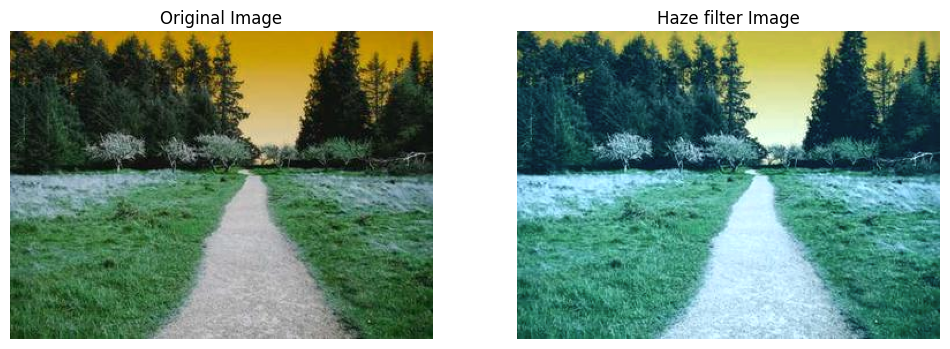

In [ ]:
# Filter 1
def haze_filter(image: np.ndarray):
  """
  This filter aims to create a slightly desaturated and foggy look, like a misty morning
  Creates a desaturated, cool and slightly foggy look.

  This filter is good for portraits and nature scenes as it adds a cool and dreamy look.
  """
  # 1.custom color Tint (Blue emphasis) & Brightness Shift
  # adds a cool tint by:
  # boosting Blue (+20)
  # reducing Red (-10)
  tinted_image= image.astype(np.float32)+np.array([-10, 30, 50], dtype=np.float32) # R, G, B adjustments

  # 2. Contrast Adjustment
  # Increases contrast by scaling the intensity around the mid-point (127.5).
  contrast_factor= 1.25
  contrast_adjusted= 127.5+contrast_factor * (tinted_image-127.5)
  contrast_adjusted= np.clip(contrast_adjusted,0,255).astype(np.uint8)

  # 3. Desaturation
  # Convert to HSV
  hsv_image = cv2.cvtColor(contrast_adjusted, cv2.COLOR_BGR2HSV)
  # Split the channels: H, S, V
  h,s,v= cv2.split(hsv_image)

  # Decrease saturation by scaling (0.75)
  sat_scale = 0.75
  s_float= s.astype(np.float32) * sat_scale
  s_clipped= np.clip(s_float,0,255).astype(np.uint8)
  # Merge the channels back
  hsv_output = cv2.merge([h,s_clipped,v])
  bgr_output = cv2.cvtColor(hsv_output,cv2.COLOR_HSV2BGR)
  return bgr_output

img2_filter_2=haze_filter(img2_rgb)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img2_rgb)
plt.title("Original Image");
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2_filter_2)
plt.title("Haze filter Image")
plt.axis('off')
plt.show()

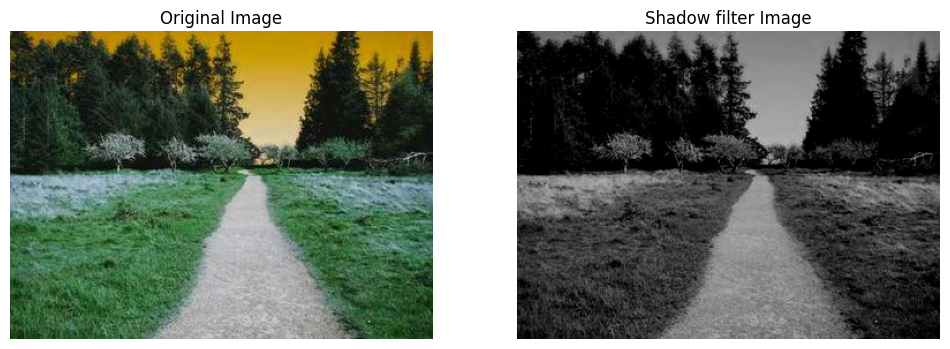

In [ ]:
# Filter 2
def shadow_filter(image: np.ndarray):
  """
  This filter is designed to give image a dark, gritty feel.
  Applies the filter for a dark and subtly teal-tinted look.

  This filter is perfect for night photography, street portraits.
  It will generally make colorful scenes look dark.
  """
  img_float = image.astype(np.float32)
  # 1.brightness shift (subtract 40 from all channels)
  brightness_shift= -40
  dark_base = img_float+ brightness_shift

  # 2. Channel mixing: this modification creates the Teal/Orange look.
  # Separate channels
  B, G, R = cv2.split(dark_base)
  R_new = R
  G_new = (G * 0.6) + (B * 0.4)
  B_new = (B * 0.5) + (G * 0.5)

  # Merge the mixed channels
  mixed_channels= cv2.merge([B_new, G_new, R_new])
  mixed_channels= np.clip(mixed_channels, 0, 255) # Clip after channel mixing

  # 3. Saturation Change (Desaturation)
  # Convert to HSV
  hsv_image= cv2.cvtColor(mixed_channels, cv2.COLOR_BGR2HSV)
  h,s,v= cv2.split(hsv_image)

  sat_scale = 0.85  # decreasing saturation to .85
  s_float= s.astype(np.float32) * sat_scale
  s_clipped= np.clip(s_float, 0, 255).astype(np.uint8)

  h = h.astype(np.uint8)
  v = v.astype(np.uint8)

  # Merge the channels back and convert to BGR
  hsv_output= cv2.merge([h, s_clipped, v])
  bgr_output= cv2.cvtColor(hsv_output, cv2.COLOR_HSV2BGR)

  return bgr_output

img2_filter=shadow_filter(img2_rgb)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img2_rgb)
plt.title("Original Image");
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2_filter)
plt.title("Shadow filter Image")
plt.axis('off')
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# white balance function
def white_patch_balance(img_rgb):

    img= img_rgb.astype(np.float32)
    max_val= img.reshape(-1,3).max(axis=0)  # brightest R,G,B pixels
    scale= 255.0 / max_val
    img_scaled= img * scale
    return np.clip(img_scaled, 0, 255).astype(np.uint8)


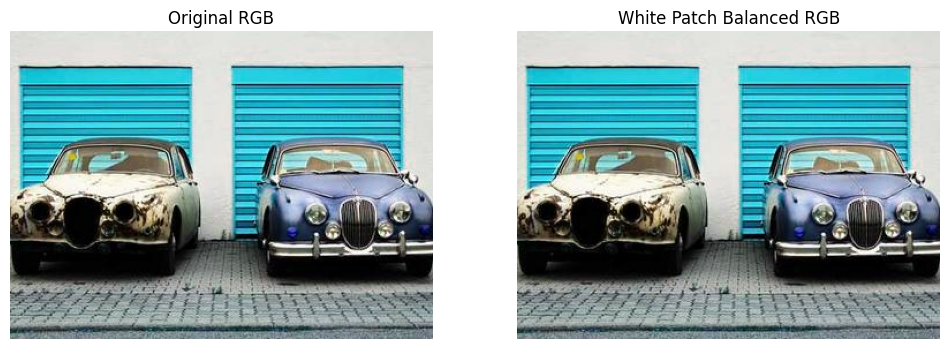

In [ ]:
# Apply white balance function
img_wpb= white_patch_balance(img_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("White Patch Balanced RGB")
plt.imshow(img_wpb)
plt.axis("off")
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )